In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler,MinMaxScaler


import warnings
warnings.filterwarnings('ignore')


In [ ]:
df=pd.read_excel("/content/drive/MyDrive/Dissertation/My Dissertation/Data/Pre-processed results/Removed missing values.xlsx")
save_df=df
print(df.dtypes)
df.head(21)


Date      datetime64[ns]
XBTUSD           float64
AUDUSD           float64
CADUSD           float64
CNYUSD           float64
EURUSD           float64
GBPUSD           float64
JPYUSD           float64
NZDUSD           float64
SGDUSD           float64
dtype: object


Date   XBTUSD  AUDUSD  CADUSD   CNYUSD  EURUSD  GBPUSD    JPYUSD  \
0  2017-01-03  1024.38  0.7219  0.7448  0.14385  1.0405  1.2237  0.008493   
1  2017-01-04  1091.66  0.7283  0.7519  0.14504  1.0489  1.2323  0.008529   
2  2017-01-05   971.26  0.7338  0.7562  0.14547  1.0607  1.2419  0.008669   
3  2017-01-06   898.16  0.7301  0.7555  0.14424  1.0532  1.2287  0.008547   
4  2017-01-08   917.41  0.7301  0.7555  0.14424  1.0532  1.2287  0.008547   
5  2017-01-09   897.51  0.7354  0.7567  0.14416  1.0574  1.2163  0.008617   
6  2017-01-10   909.81  0.7368  0.7557  0.14435  1.0554  1.2177  0.008637   
7  2017-01-11   789.11  0.7441  0.7589  0.14471  1.0582  1.2213  0.008665   
8  2017-01-12   827.63  0.7484  0.7608  0.14515  1.0613  1.2162  0.008717   
9  2017-01-13   830.70  0.7502  0.7625  0.14506  1.0643  1.2182  0.008733   
10 2017-01-15   822.20  0.7502  0.7625  0.14506  1.0643  1.2182  0.008733   
11 2017-01-16   833.10  0.7477  0.7589  0.14506  1.0601  1.2047  0.008757   
12 2017-01-17   898.92  0.7567  0.7668  0.14613  1.0713  1.2414  0.008880   
13 2017-01-18   875.76  0.7505  0.7535  0.14546  1.0630  1.2261  0.008724   
14 2017-01-19   907.31  0.7561  0.7509  0.14530  1.0664  1.2342  0.008706   
15 2017-01-20   898.86  0.7555  0.7508  0.14551  1.0703  1.2375  0.008724   
16 2017-01-22   920.85  0.7555  0.7508  0.14551  1.0703  1.2375  0.008724   
17 2017-01-23   921.64  0.7584  0.7554  0.14635  1.0765  1.2535  0.008873   
18 2017-01-24   898.19  0.7582  0.7600  0.14599  1.0731  1.2520  0.008788   
19 2017-01-25   895.34  0.7572  0.7651  0.14569  1.0748  1.2634  0.008828   
20 2017-01-26   914.19  0.7535  0.7637  0.14543  1.0682  1.2597  0.008731   

    NZDUSD  SGDUSD  
0   0.6918  0.6895  
1   0.6970  0.6948  
2   0.7026  0.7001  
3   0.6960  0.6950  
4   0.6960  0.6950  
5   0.7016  0.6962  
6   0.6990  0.6963  
7   0.7055  0.7008  
8   0.7095  0.7006  
9   0.7131  0.6998  
10  0.7131  0.6998  
11  0.7103  0.6991  
12  0.7215  0.7065  
13  0.7123  0.6995  
14  0.7190  0.7014  
15  0.7170  0.7015  
16  0.7170  0.7015  
17  0.7233  0.7053  
18  0.7247  0.7036  
19  0.7299  0.7077  
20  0.7245  0.7010

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
train=save_df.head(14)

In [ ]:
df=df.set_index('Date',drop=True)
df

XBTUSD  AUDUSD  CADUSD   CNYUSD  EURUSD  GBPUSD    JPYUSD  \
Date                                                                      
2017-01-03   1024.38  0.7219  0.7448  0.14385  1.0405  1.2237  0.008493   
2017-01-04   1091.66  0.7283  0.7519  0.14504  1.0489  1.2323  0.008529   
2017-01-05    971.26  0.7338  0.7562  0.14547  1.0607  1.2419  0.008669   
2017-01-06    898.16  0.7301  0.7555  0.14424  1.0532  1.2287  0.008547   
2017-01-08    917.41  0.7301  0.7555  0.14424  1.0532  1.2287  0.008547   
...              ...     ...     ...      ...     ...     ...       ...   
2022-07-17  20930.58  0.6793  0.7678  0.14799  1.0080  1.1855  0.007220   
2022-07-18  21487.97  0.6812  0.7701  0.14830  1.0143  1.1953  0.007240   
2022-07-19  23304.71  0.6897  0.7770  0.14827  1.0227  1.1995  0.007236   
2022-07-20  23258.12  0.6888  0.7762  0.14805  1.0180  1.1973  0.007235   
2022-07-21  22848.73  0.6874  0.7748  0.14787  1.0199  1.1943  0.007211   

            NZDUSD  SGDUSD  
Date                        
2017-01-03  0.6918  0.6895  
2017-01-04  0.6970  0.6948  
2017-01-05  0.7026  0.7001  
2017-01-06  0.6960  0.6950  
2017-01-08  0.6960  0.6950  
...            ...     ...  
2022-07-17  0.6165  0.7144  
2022-07-18  0.6154  0.7156  
2022-07-19  0.6225  0.7181  
2022-07-20  0.6239  0.7176  
2022-07-21  0.6202  0.7185  

[1836 rows x 9 columns]

**Plot each time series variable against date**

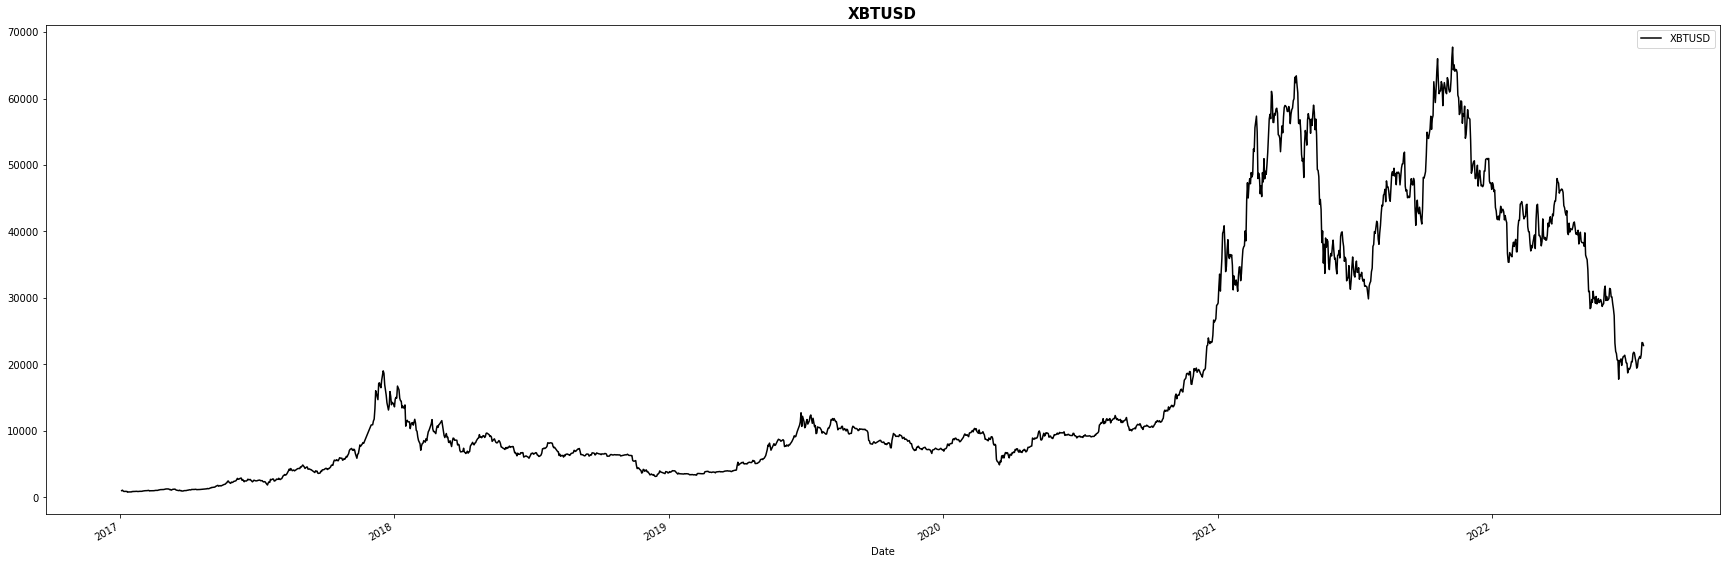

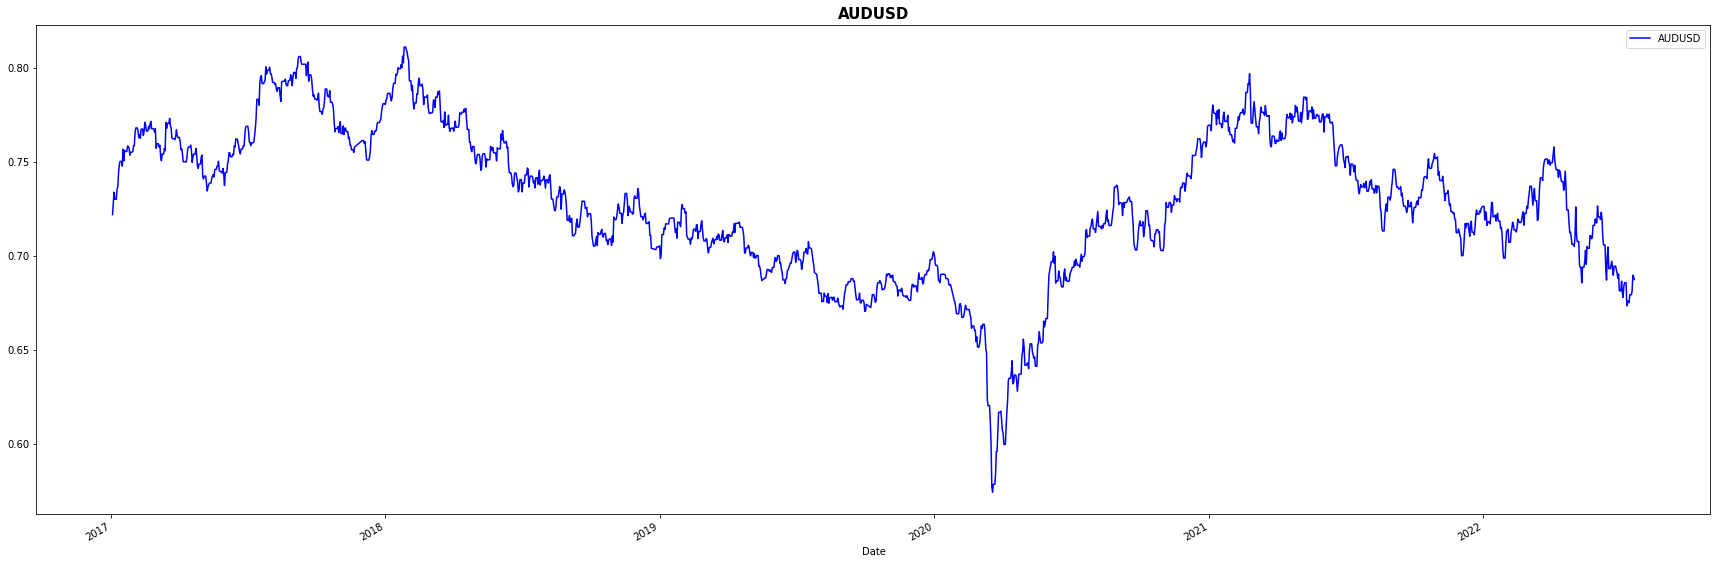

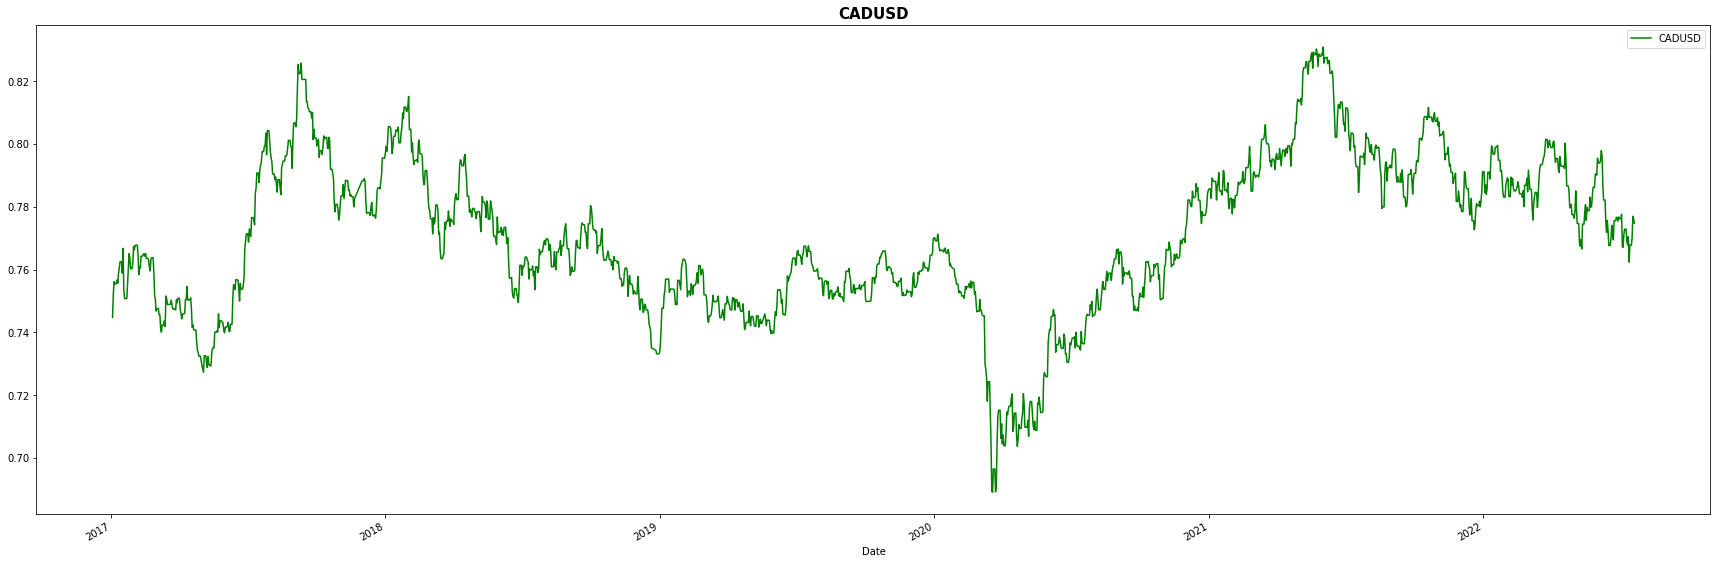

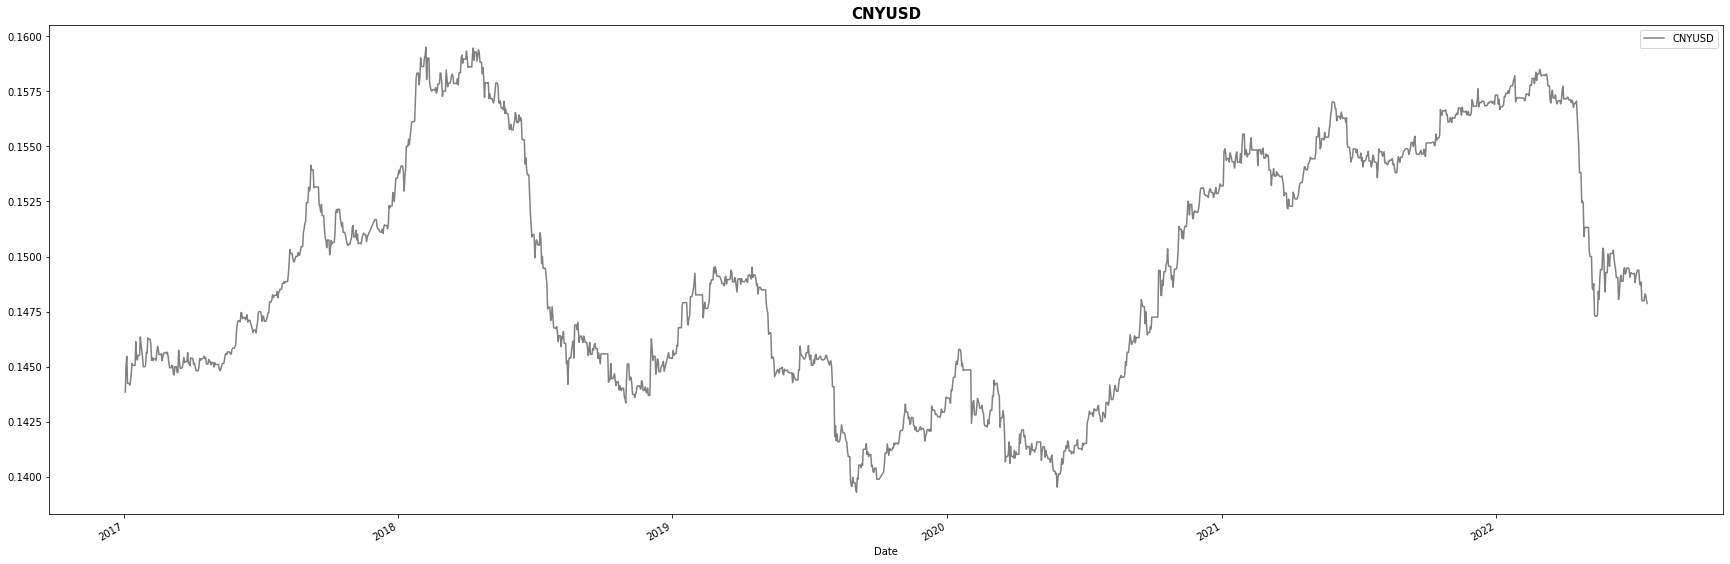

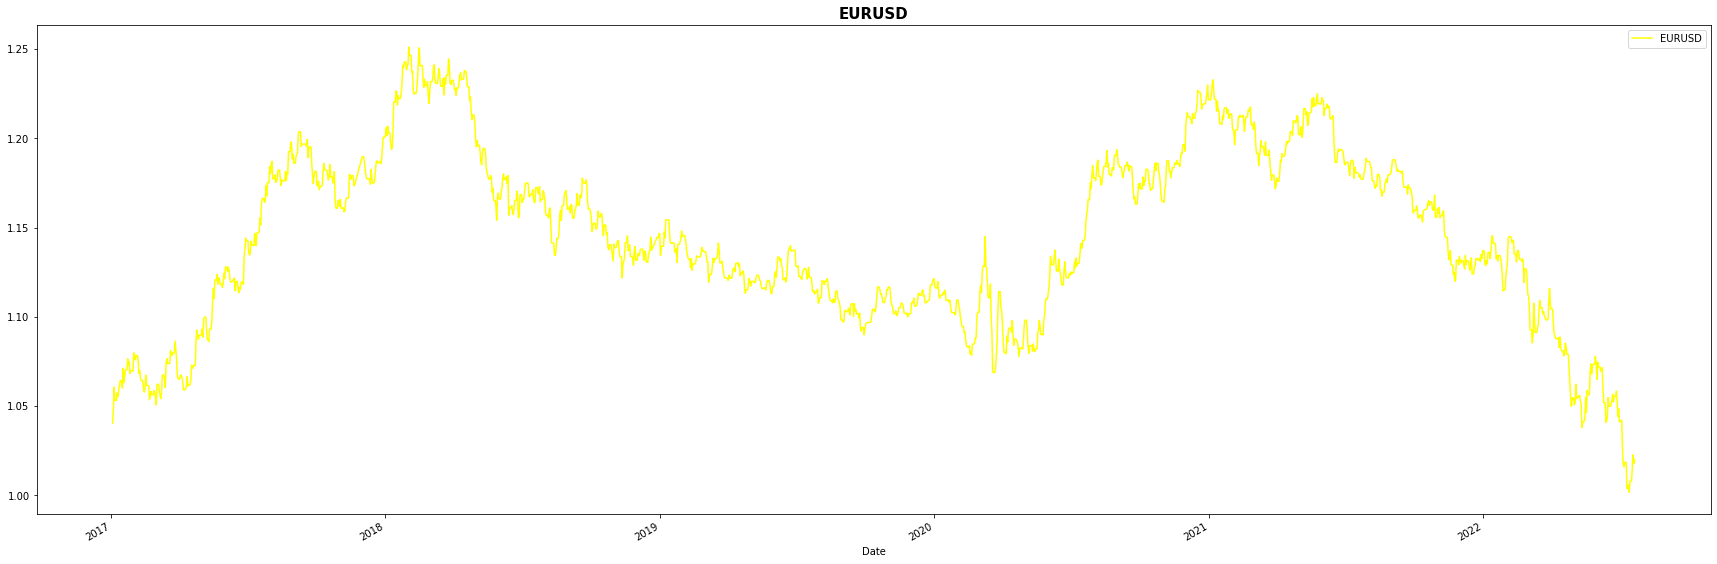

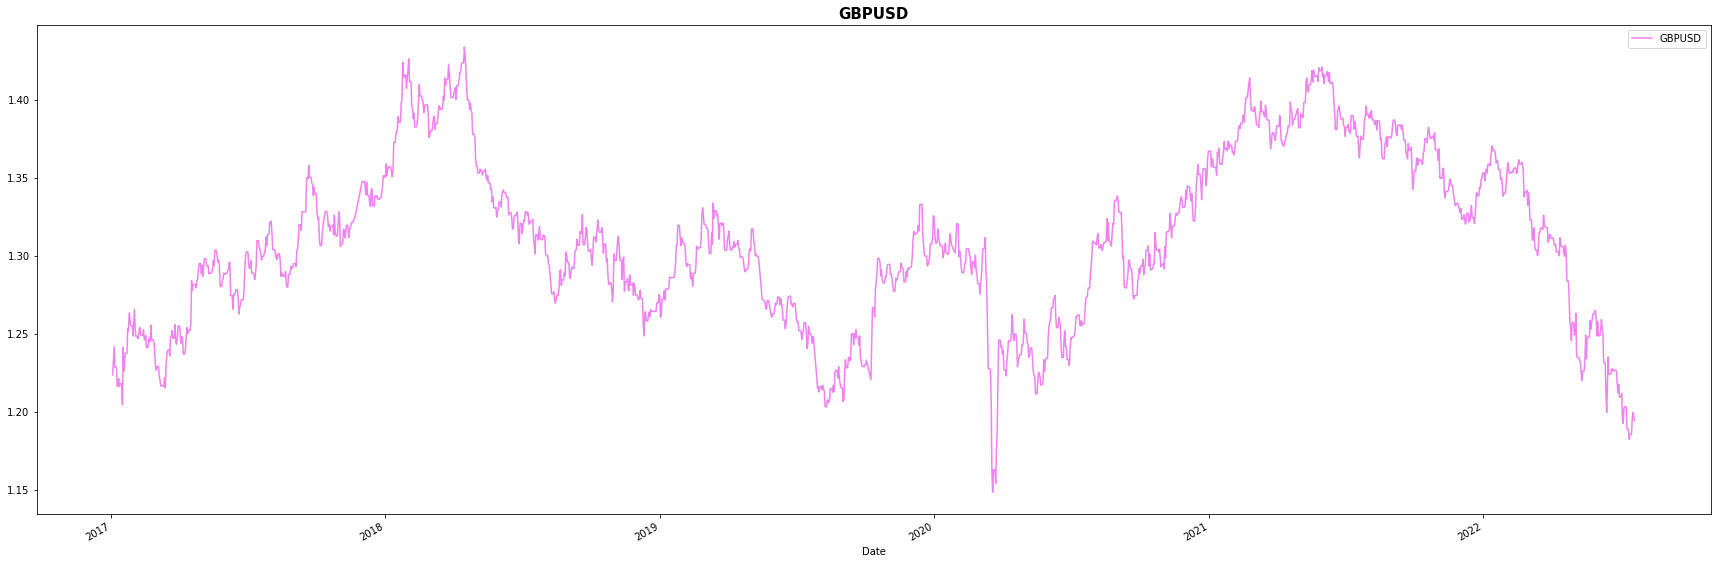

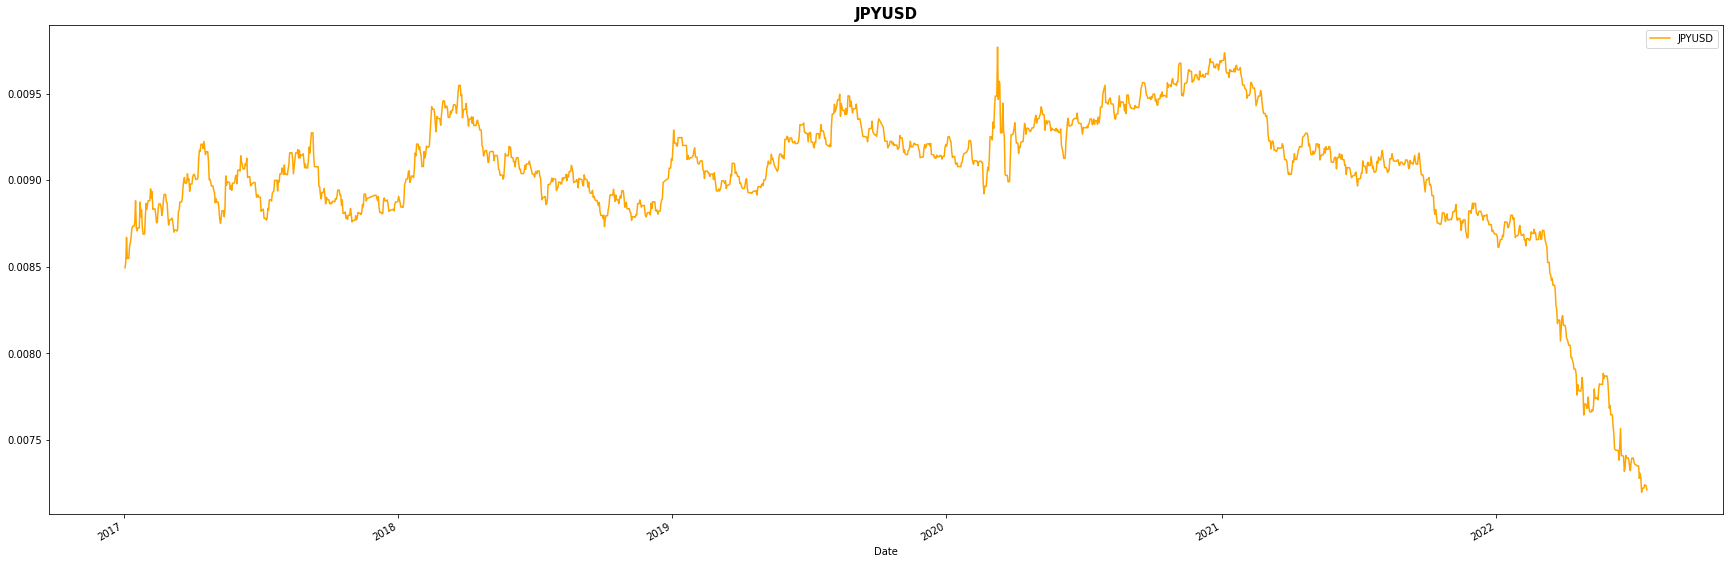

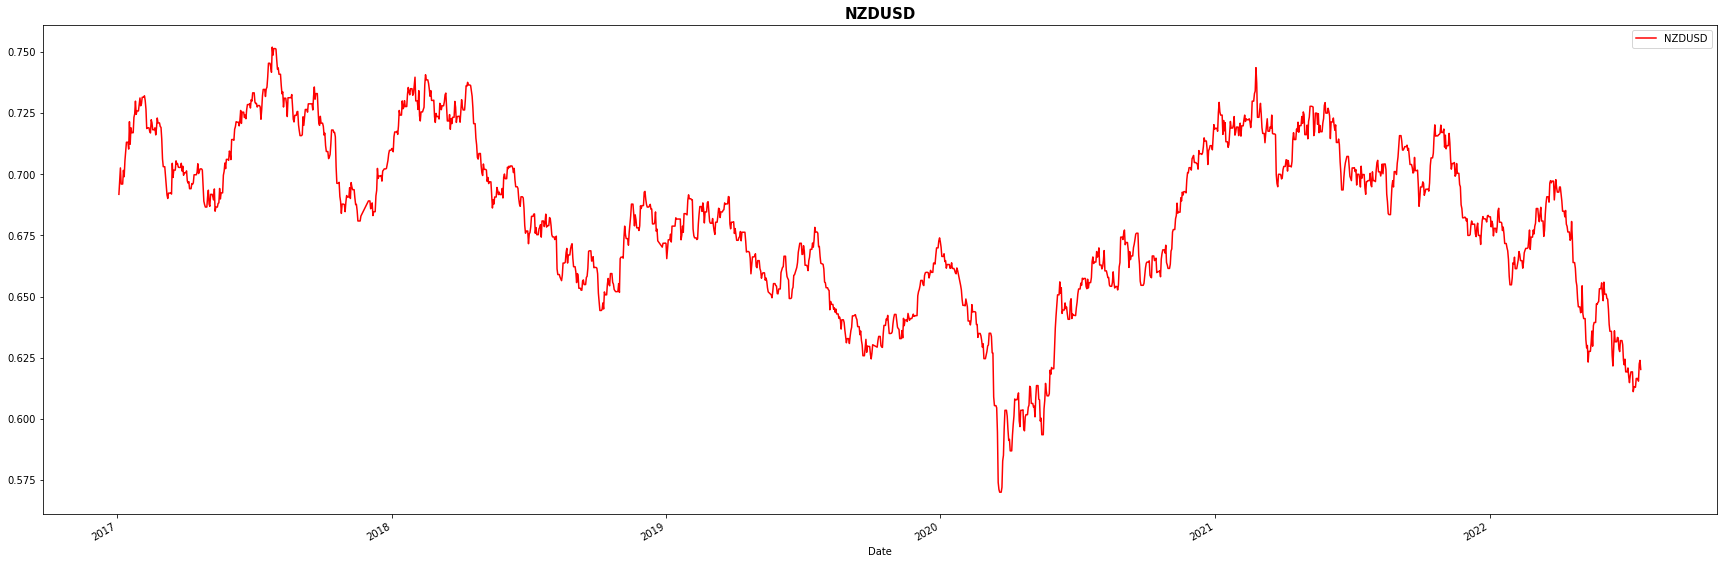

In [ ]:
column_list=df.columns
colour =['black','blue','green','grey','yellow','violet','orange','red','brown']
for i in range(len(column_list)-1):
  df.plot(y=column_list[i],subplots=True,figsize=(30,10),color=colour[i])
  plt.title(column_list[i],fontweight="bold",fontsize = 15)
  plt.xlabel = 'Date'
  plt.ylabel = 'price in'+ column_list[i]
  plt.show()


Scale the data for better visibility of XBTUSD vs other currencies

In [ ]:
scaler=StandardScaler()
scaled_Df=scaler.fit_transform(df)

In [ ]:
scaled_Df=pd.DataFrame(scaled_Df)
scaled_Df['Date']=save_df['Date']


In [ ]:
column_list

['XBTUSD',
 'AUDUSD',
 'CADUSD',
 'CNYUSD',
 'EURUSD',
 'GBPUSD',
 'JPYUSD',
 'NZDUSD',
 'SGDUSD',
 'Date']

Plot XBTUSD vs other currency rates for the scaled data to understand the pattern of each variable against XBTUSD

In [ ]:
column_list=['XBTUSD', 'AUDUSD', 'CADUSD', 'CNYUSD', 'EURUSD', 'GBPUSD', 'JPYUSD',
       'NZDUSD', 'SGDUSD','Date']
scaled_Df.columns=column_list
scaled_Df=scaled_Df.set_index('Date', drop=True)

In [ ]:
scaled_Df

XBTUSD    AUDUSD    CADUSD    CNYUSD    EURUSD    GBPUSD  \
Date                                                                     
2017-01-03 -0.985136 -0.160075 -1.019055 -1.024403 -2.108259 -1.593220   
2017-01-04 -0.981362  0.000790 -0.735573 -0.809111 -1.938192 -1.435831   
2017-01-05 -0.988115  0.139033 -0.563888 -0.731316 -1.699288 -1.260140   
2017-01-06 -0.992214  0.046033 -0.591836 -0.953845 -1.851133 -1.501715   
2017-01-08 -0.991135  0.046033 -0.591836 -0.953845 -1.851133 -1.501715   
...              ...       ...       ...       ...       ...       ...   
2022-07-17  0.131268 -1.230833 -0.100735 -0.275404 -2.766257 -2.292322   
2022-07-18  0.162528 -1.183076 -0.008903 -0.219319 -2.638707 -2.112971   
2022-07-19  0.264417 -0.969427  0.266593 -0.224747 -2.468640 -2.036106   
2022-07-20  0.261804 -0.992049  0.234651 -0.264549 -2.563796 -2.076369   
2022-07-21  0.238844 -1.027238  0.178754 -0.297114 -2.525329 -2.131272   

              JPYUSD    NZDUSD    SGDUSD  
Date                                      
2017-01-03 -1.193498  0.311436 -3.080719  
2017-01-04 -1.111617  0.463010 -2.709255  
2017-01-05 -0.793190  0.626243 -2.337790  
2017-01-06 -1.070676  0.433861 -2.695237  
2017-01-08 -1.070676  0.433861 -2.695237  
...              ...       ...       ...  
2022-07-17 -4.088907 -1.883467 -1.335536  
2022-07-18 -4.043418 -1.915530 -1.251431  
2022-07-19 -4.052516 -1.708574 -1.076212  
2022-07-20 -4.054790 -1.667766 -1.111256  
2022-07-21 -4.109377 -1.775616 -1.048177  

[1836 rows x 9 columns]

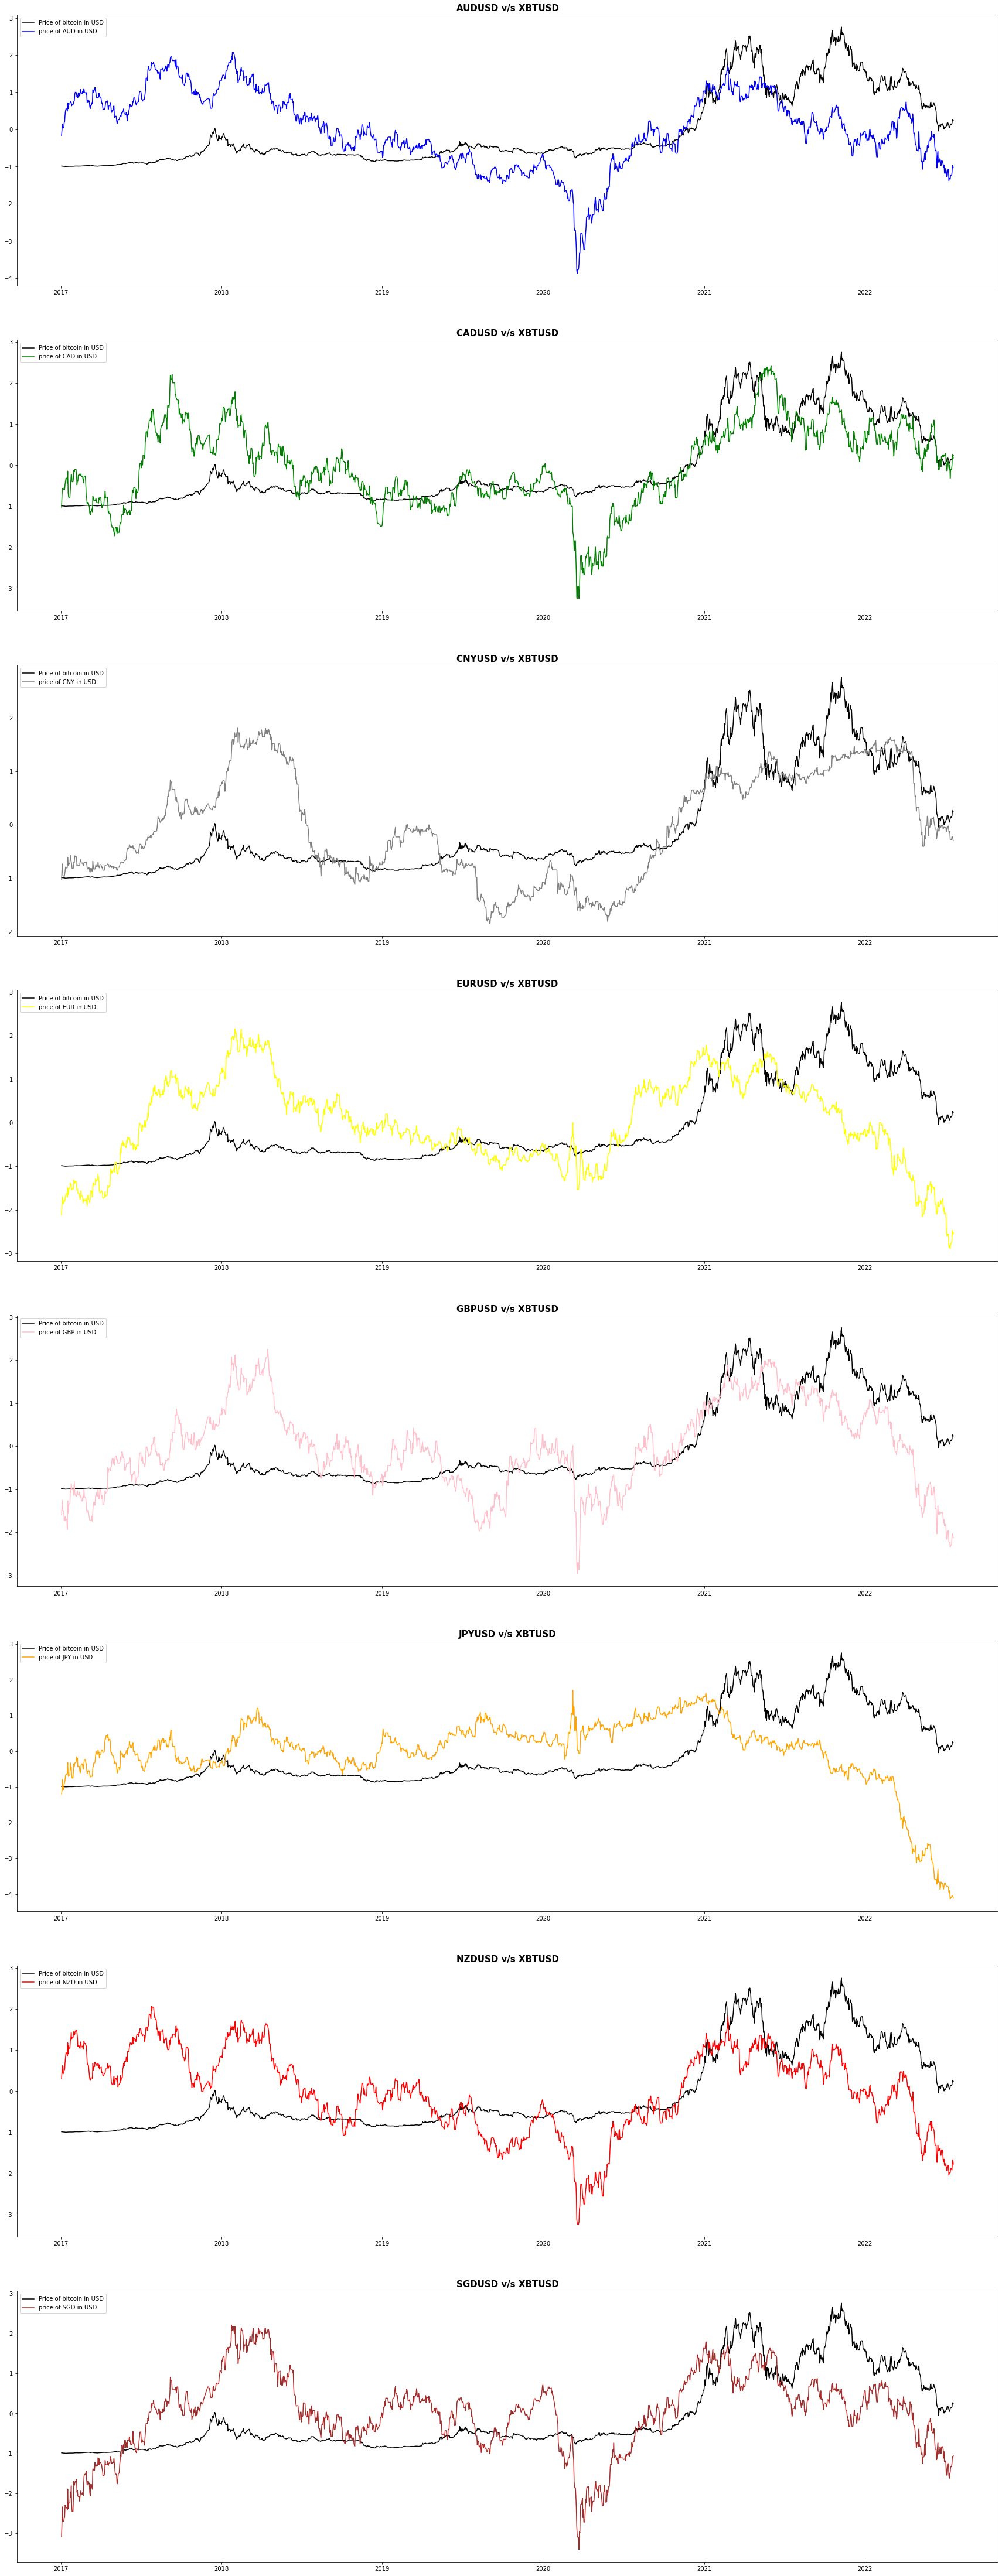

In [ ]:
column_list=df.columns
colour =['blue','green','grey','yellow','pink','orange','red','brown']
fig1, axs = plt.subplots(8,figsize=(30, 80))
#plt.rcParams["figure.figsize"] = (256,10)

for i in range(len(column_list)-1):
  axs[i].plot(scaled_Df['XBTUSD'],color='Black',label='Price of bitcoin in USD')
  label2='price of '+ column_list[i+1][0:3] + ' in USD'
  axs[i].plot(scaled_Df[column_list[i+1]],color=colour[i],label=label2)
  axs[i].figsize=(30,10)
  axs[i].set_title(column_list[i+1] + ' v/s XBTUSD',fontweight="bold",fontsize = 15)
  axs[i].legend(loc="upper left")
  axs[i].xlabel = 'Date'
  axs[i].ylabel = 'prices'


Since the patterns are not seen cleared in the above graphs, smooothen the data using rolling mean for better visibility

In [ ]:
s_Df1=pd.DataFrame(scaled_Df)


In [ ]:
s_Df=s_Df1.rolling(30).mean().dropna()

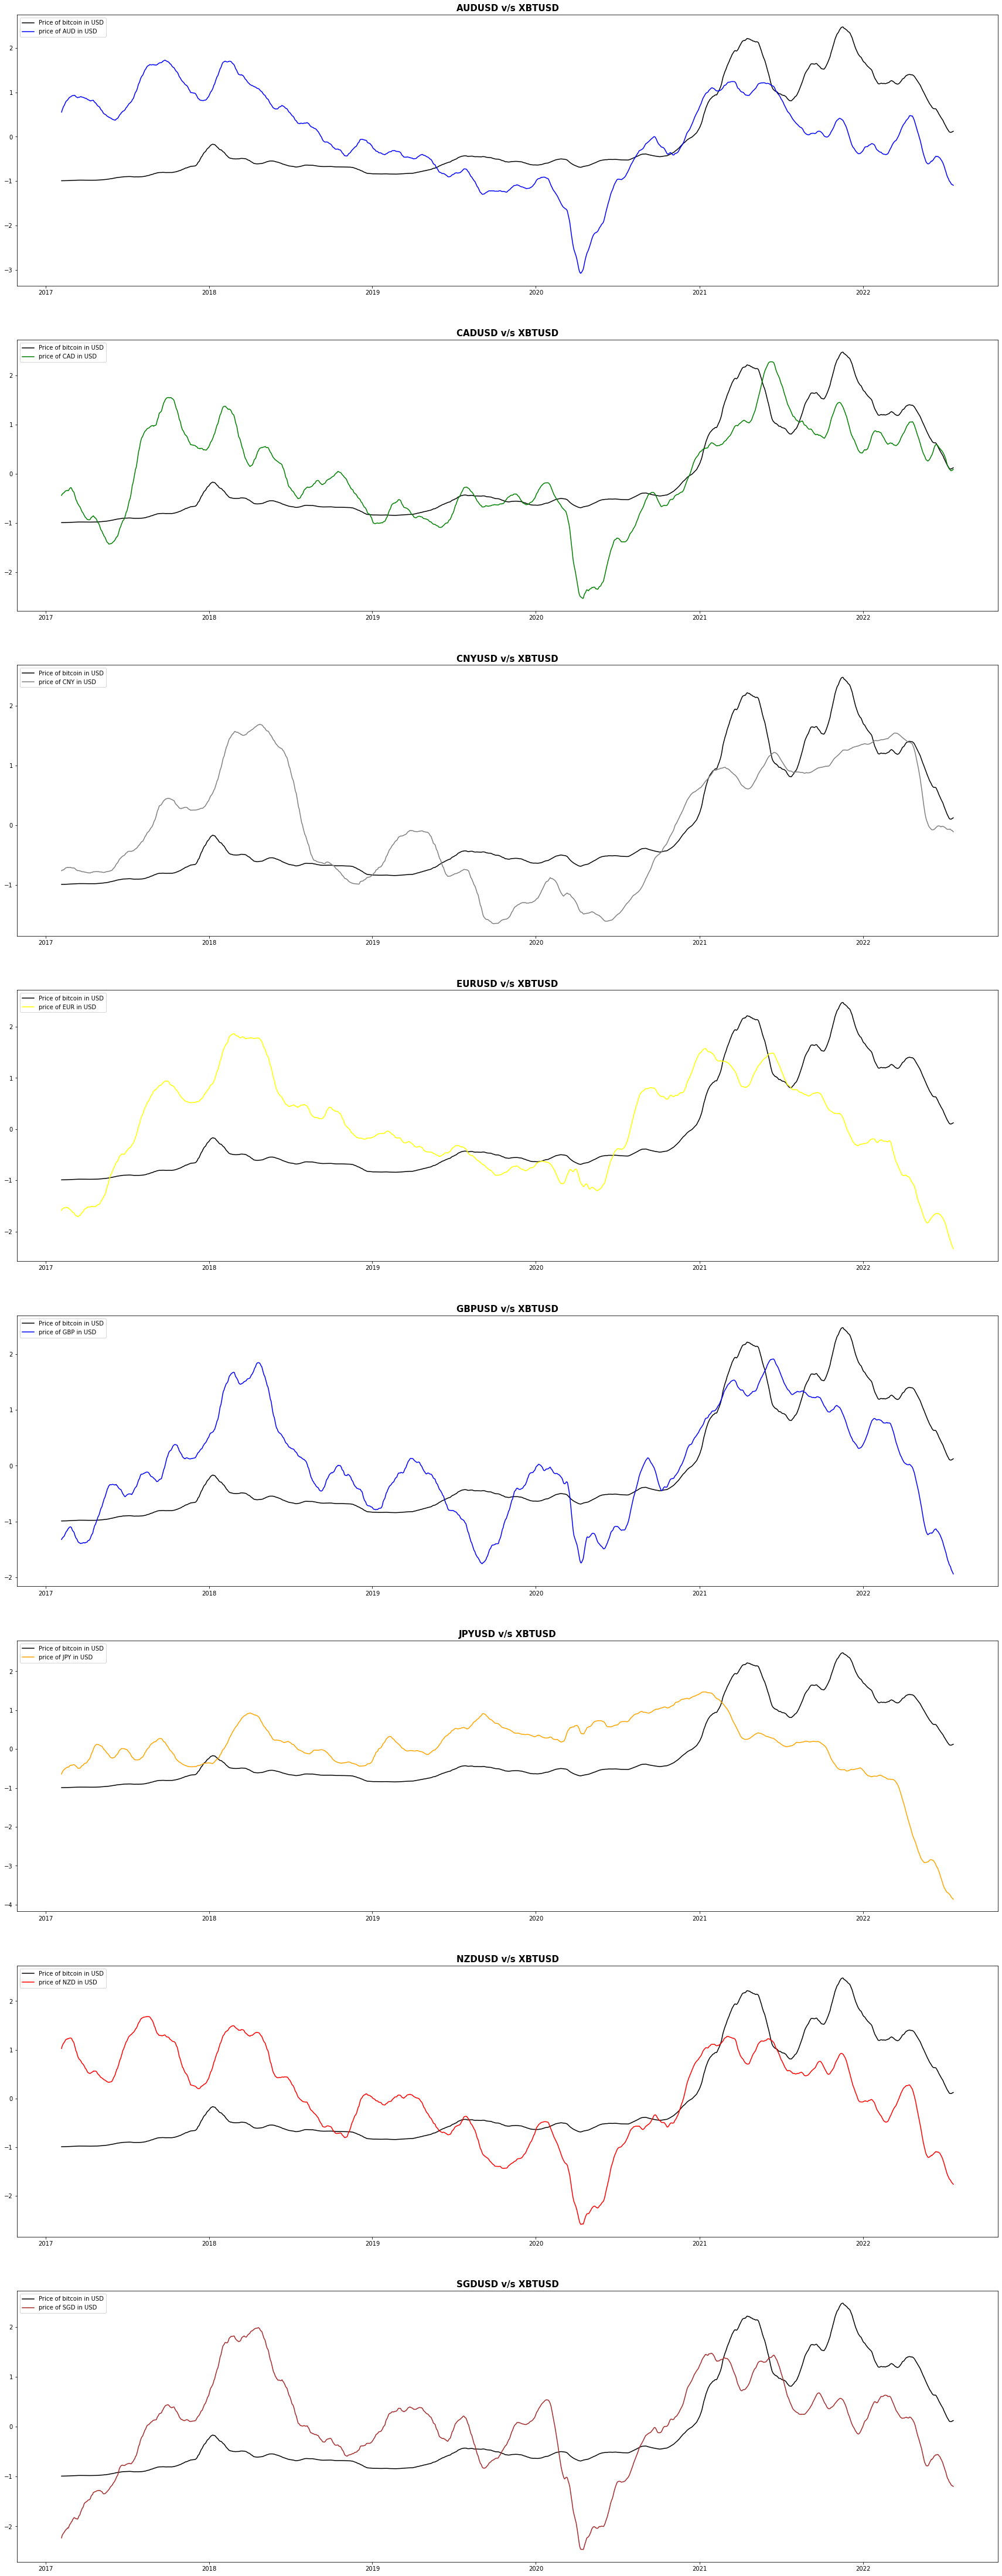

In [ ]:
 
column_list=df.columns
colour =['blue','green','grey','yellow','blue','orange','red','brown']
fig1, axs = plt.subplots(8,figsize=(30, 80))
#plt.rcParams["figure.figsize"] = (256,10)

for i in range(len(column_list)-1):
  axs[i].plot(s_Df['XBTUSD'],color='Black',label='Price of bitcoin in USD')
  label2='price of '+ column_list[i+1][0:3] + ' in USD'
  axs[i].plot(s_Df[column_list[i+1]],color=colour[i],label=label2)
  axs[i].figsize=(20,8)
  axs[i].set_title(column_list[i+1] + ' v/s XBTUSD',fontweight="bold",fontsize = 15)
  axs[i].legend(loc="upper left")
  axs[i].xlabel = 'Date'
  axs[i].ylabel = 'prices'

From the above graphs, we can see a little correlation between [XBTUSD, GBPUSD], [XBTUSD, CADUSD] and [XBTUSD, CNYUSD]

Lets verify using correlation map.

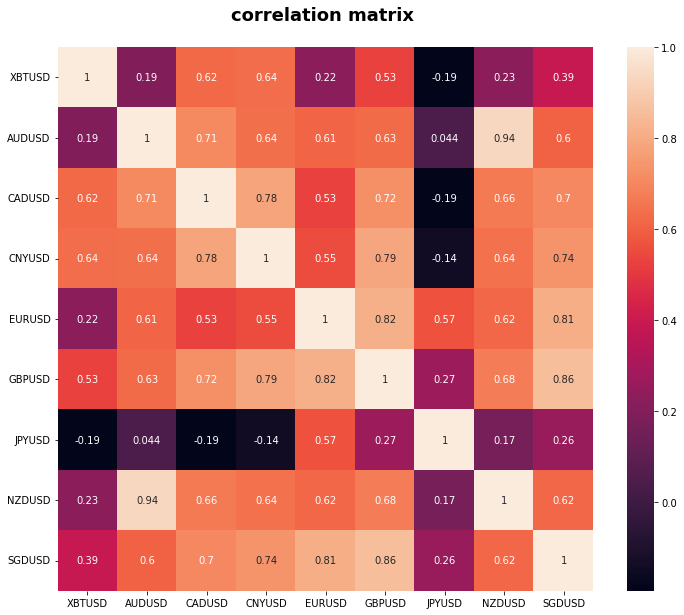

In [ ]:
import seaborn as sns
df_corr=df.corr()

x_axis_labels = df_corr.columns
y_axis_labels = df_corr.columns
p =  sns.heatmap(df_corr, annot=True, xticklabels=x_axis_labels, yticklabels=y_axis_labels)  
p.set_title('correlation matrix \n',fontweight="bold",fontsize = 18)   
plt.rcParams["figure.figsize"] = (12,10)
plt.yticks(rotation=0) 
plt.xticks(rotation=0) 
plt.show()  

The above correlation plot shows the correlation coefficient of 0.53, 0.62, 0.64 between [XBTUSD, GBPUSD], [XBTUSD, CADUSD] and [XBTUSD, CNYUSD] respectively

lets plot the correlation map for scaled data

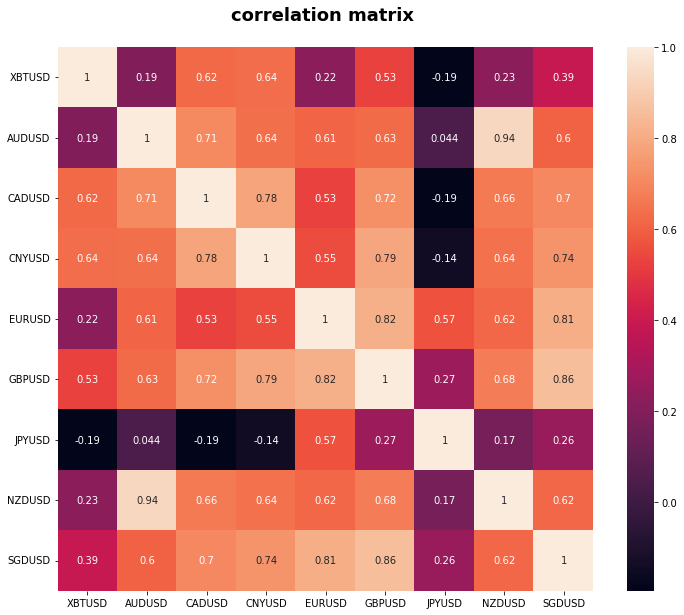

In [ ]:
s_Df1_corr=s_Df1.corr()
x_axis_labels = df_corr.columns
y_axis_labels = df_corr.columns
p =  sns.heatmap(s_Df1_corr, annot=True, xticklabels=x_axis_labels, yticklabels=y_axis_labels)  
p.set_title('correlation matrix \n',fontweight="bold",fontsize = 18)   
plt.rcParams["figure.figsize"] = (12,10)
plt.yticks(rotation=0) 
plt.xticks(rotation=0) 
plt.show()  

From the above correlation graphs we can see that there is a little positive correlation between XBTUSD and other currencies like CAD, CNY and GBP which shows co-efficient factors greater than 0.5

Now lets check autocorrelation among the different time series features by plotting autocorrelation and partial autocorrelation graphs. 
These graphs determine the strength of relationship of observations in time series 

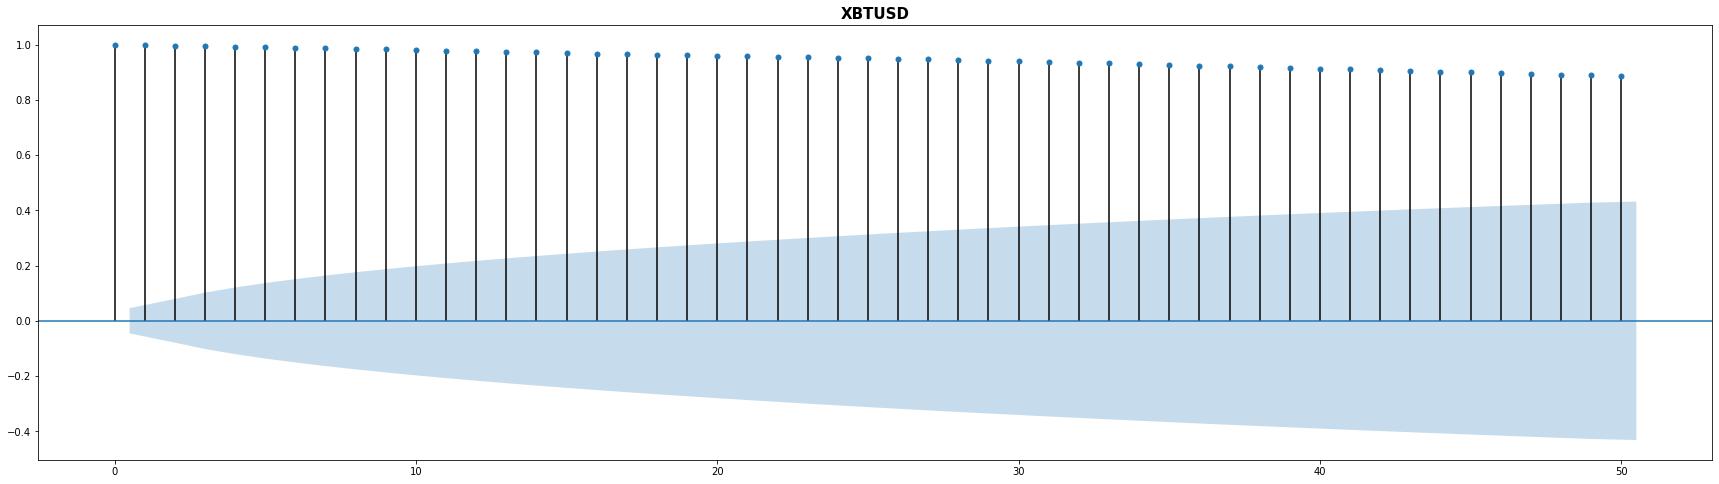

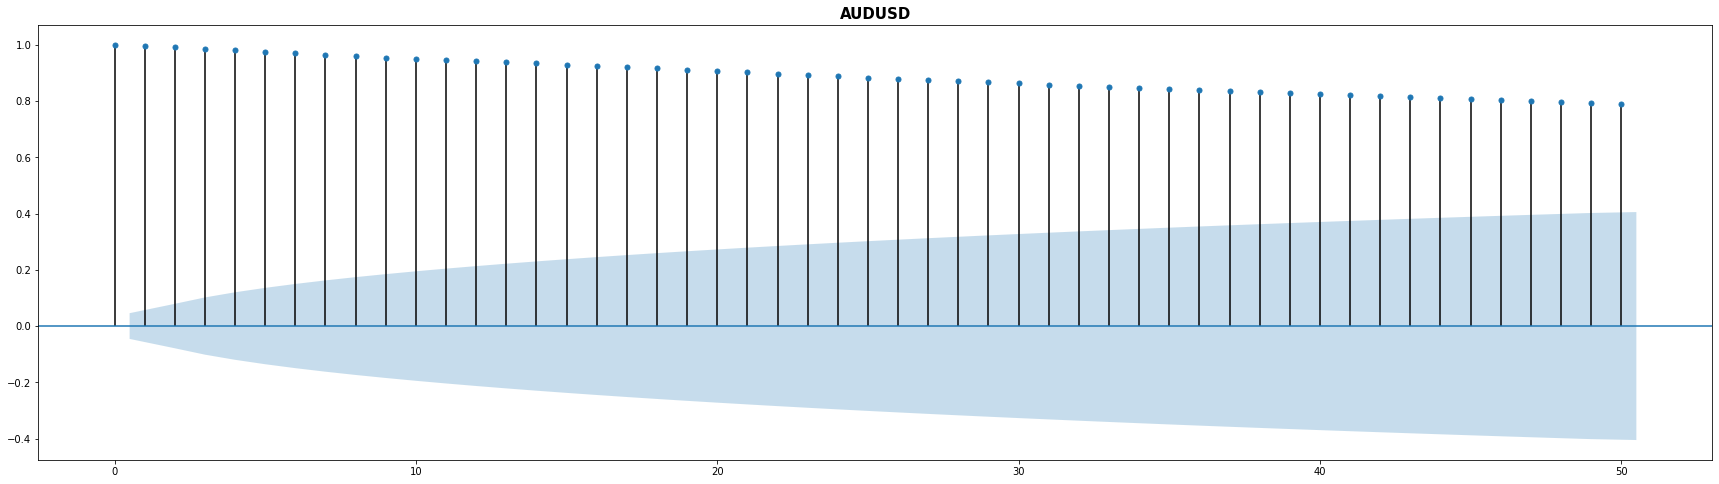

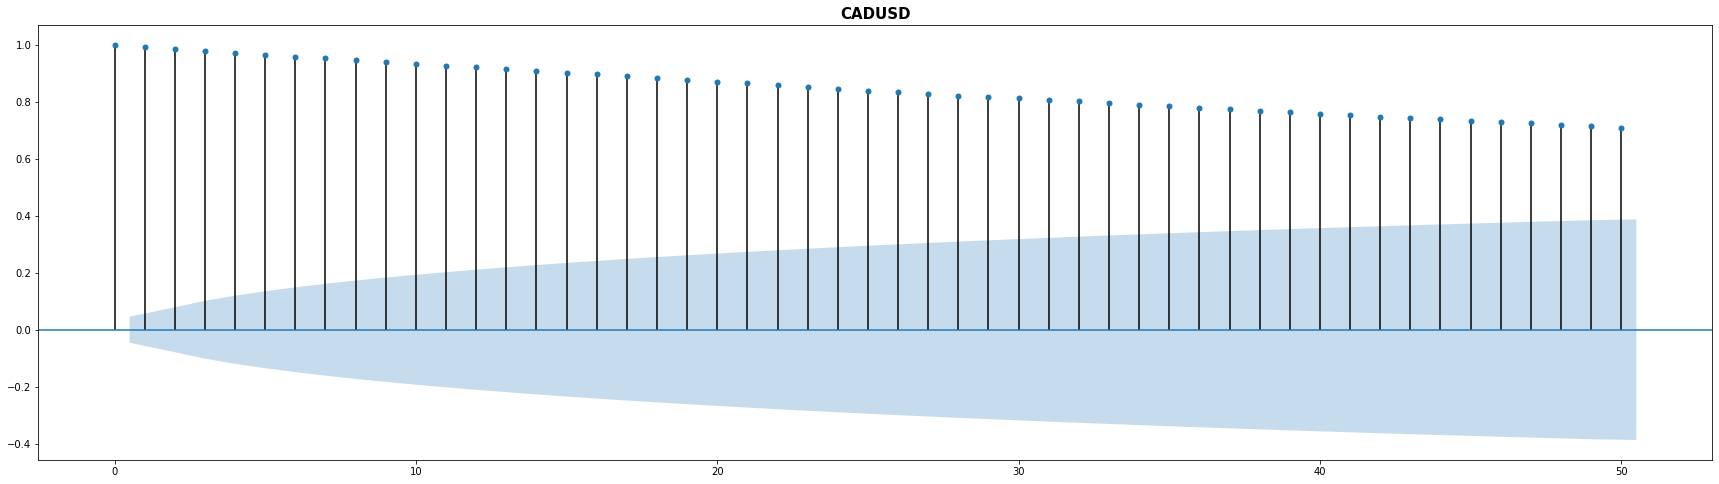

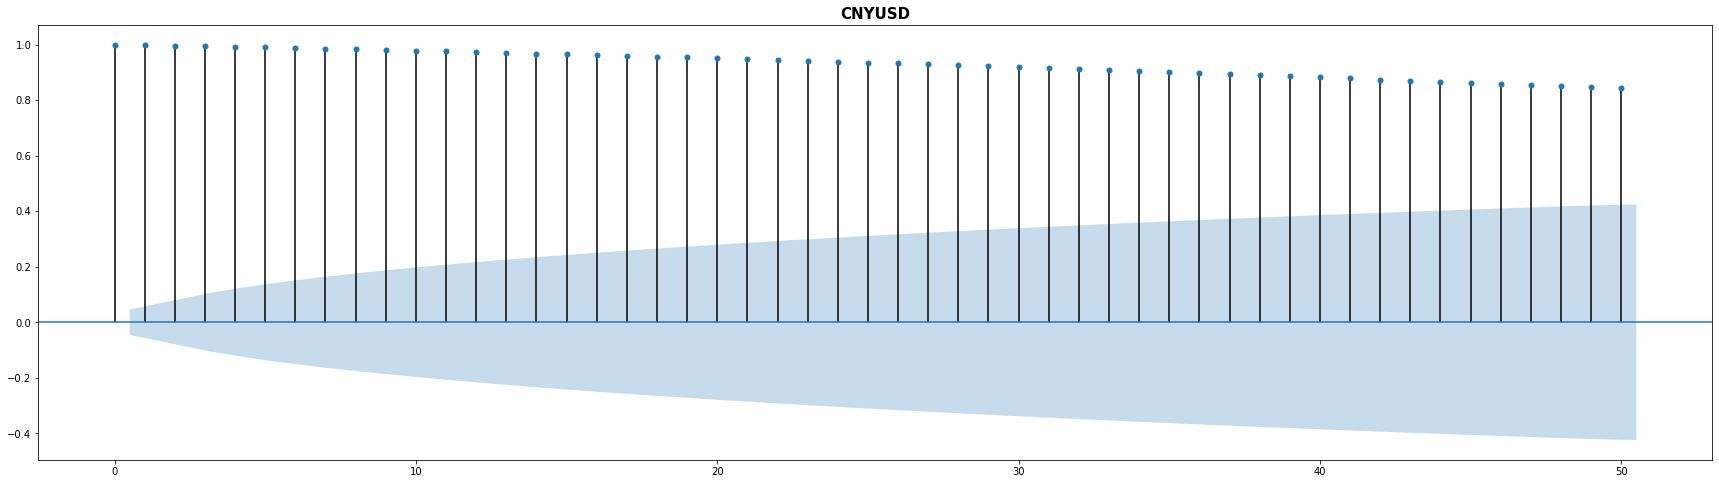

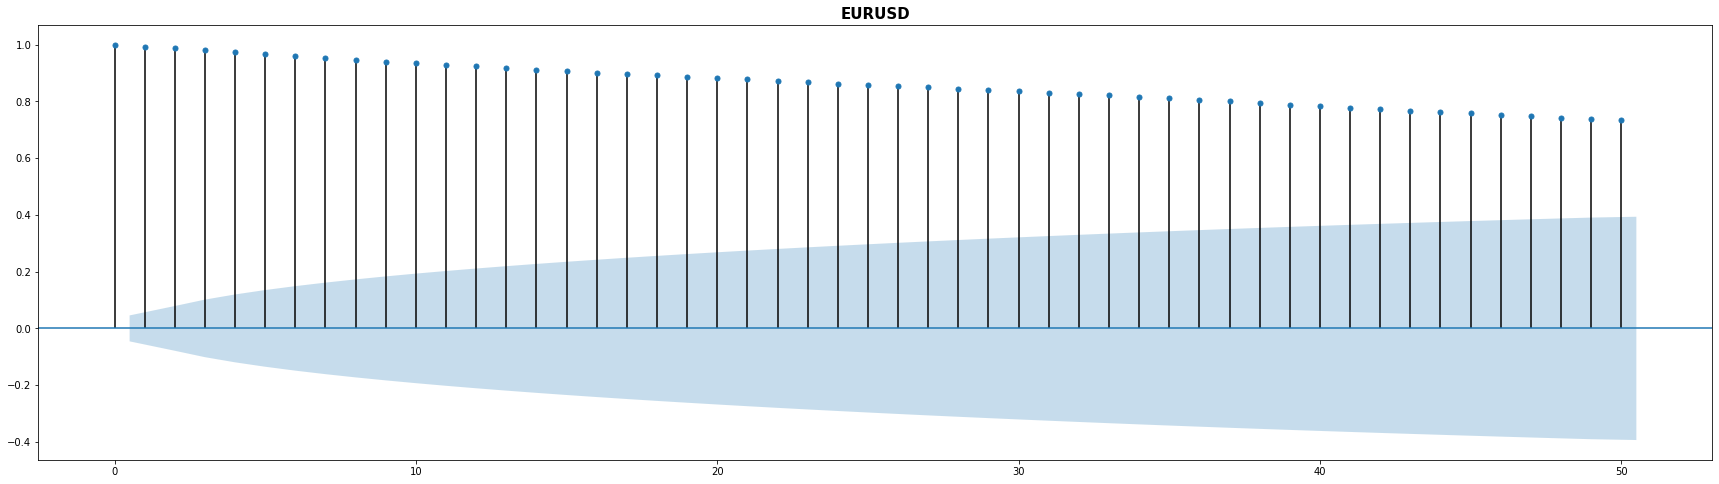

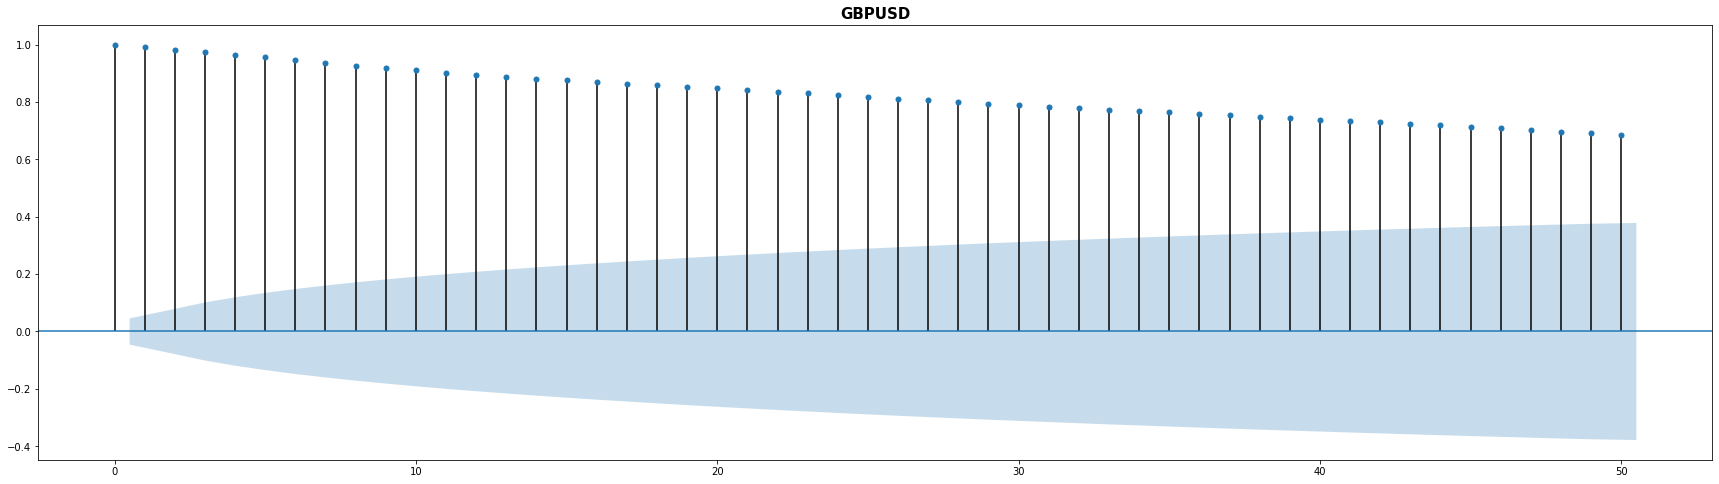

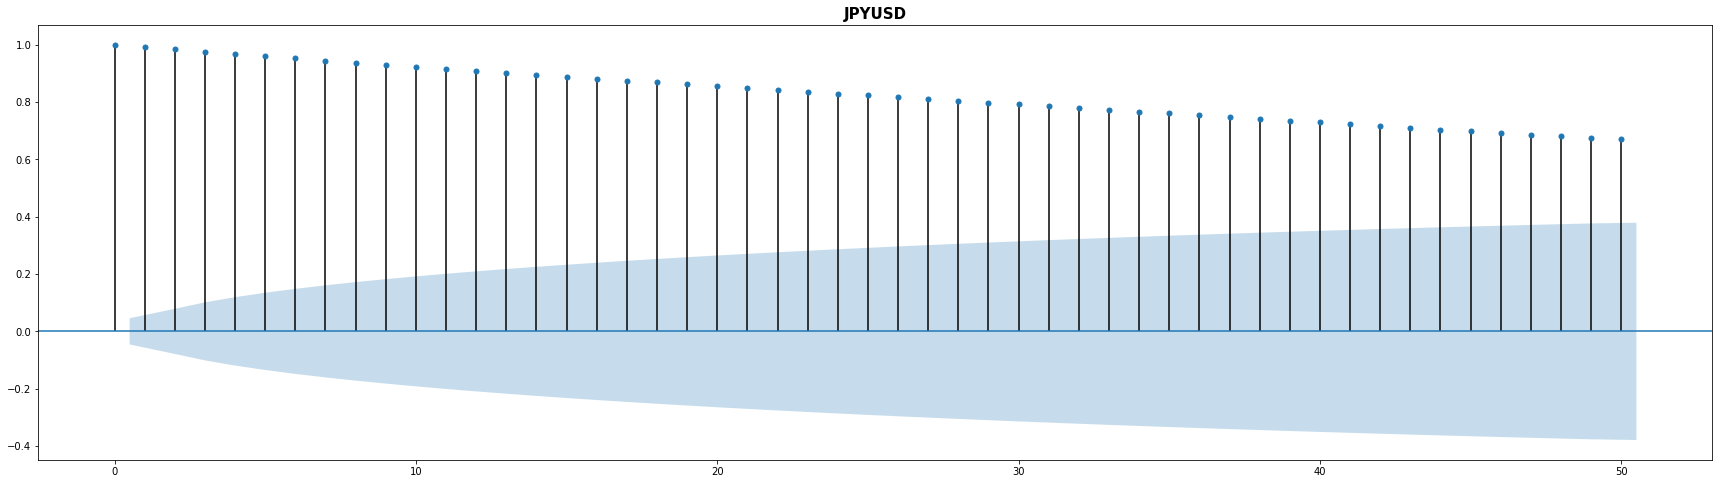

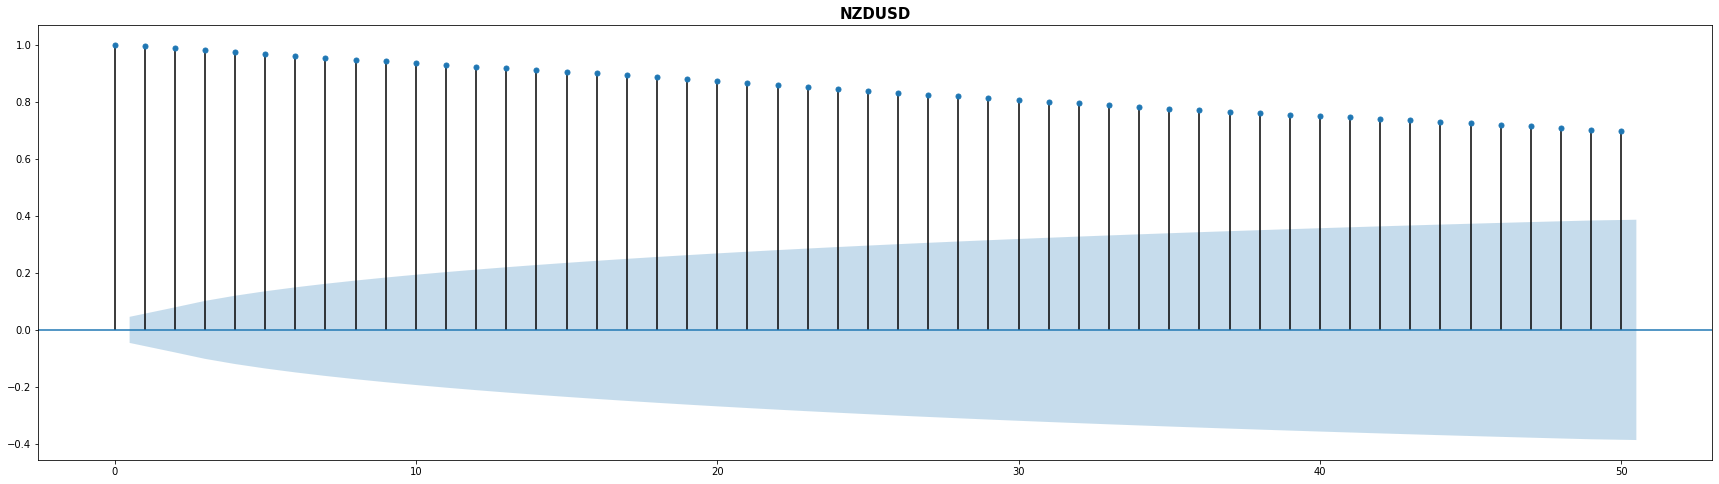

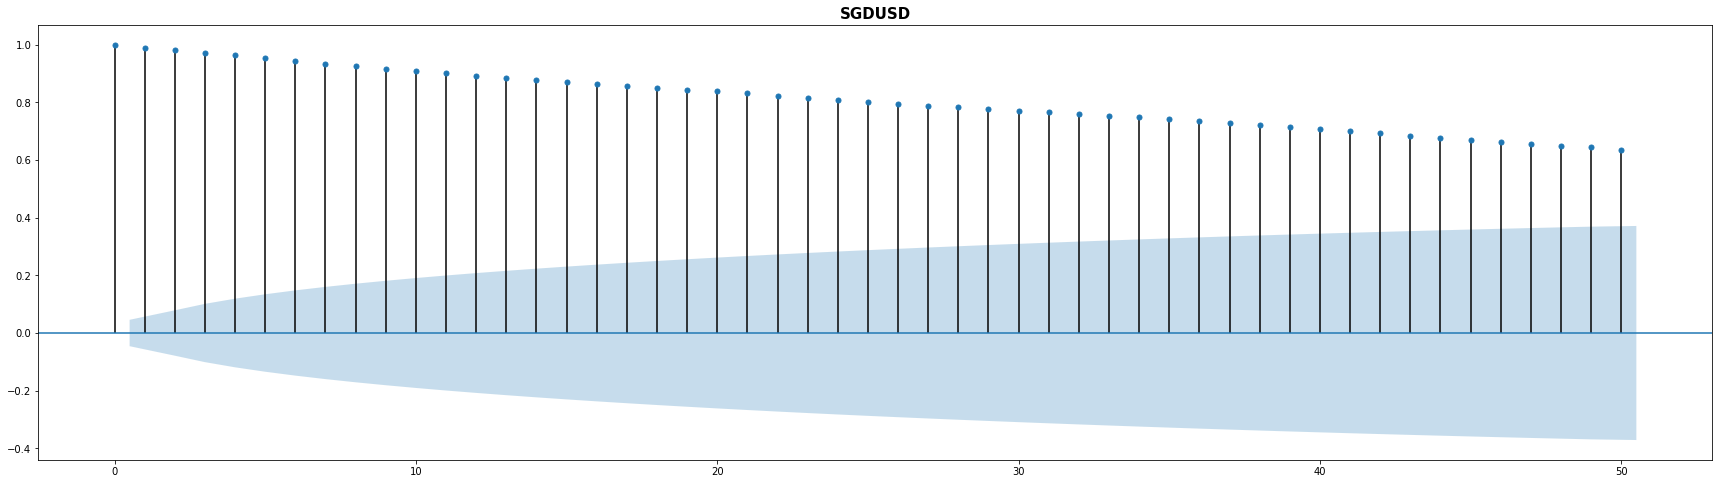

In [ ]:
import statsmodels.api as sm

column_list=df.columns

#colour =['black','blue','green','grey','yellow','violet','orange','red','brown']
for i in range(len(column_list)):
  plt.rcParams["figure.figsize"] = (30,8)
  sm.graphics.tsa.plot_acf(df[column_list[i]], lags=50);
  plt.title(column_list[i],fontweight="bold",fontsize = 15)
  #plt.xlabel = 'Date'
  #plt.ylabel = 'price in'+ column_list[i]
  plt.show()


We can see that there is a strong correlation among the the time series variables.

Next, lets plot PACF graph.

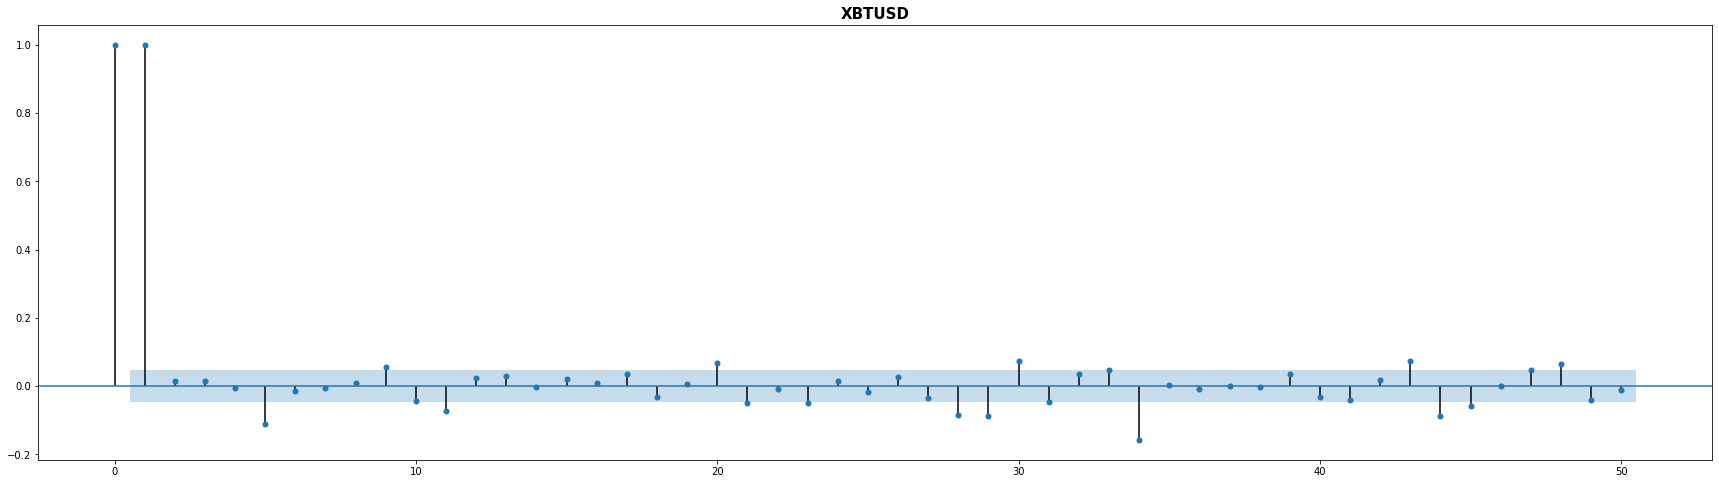

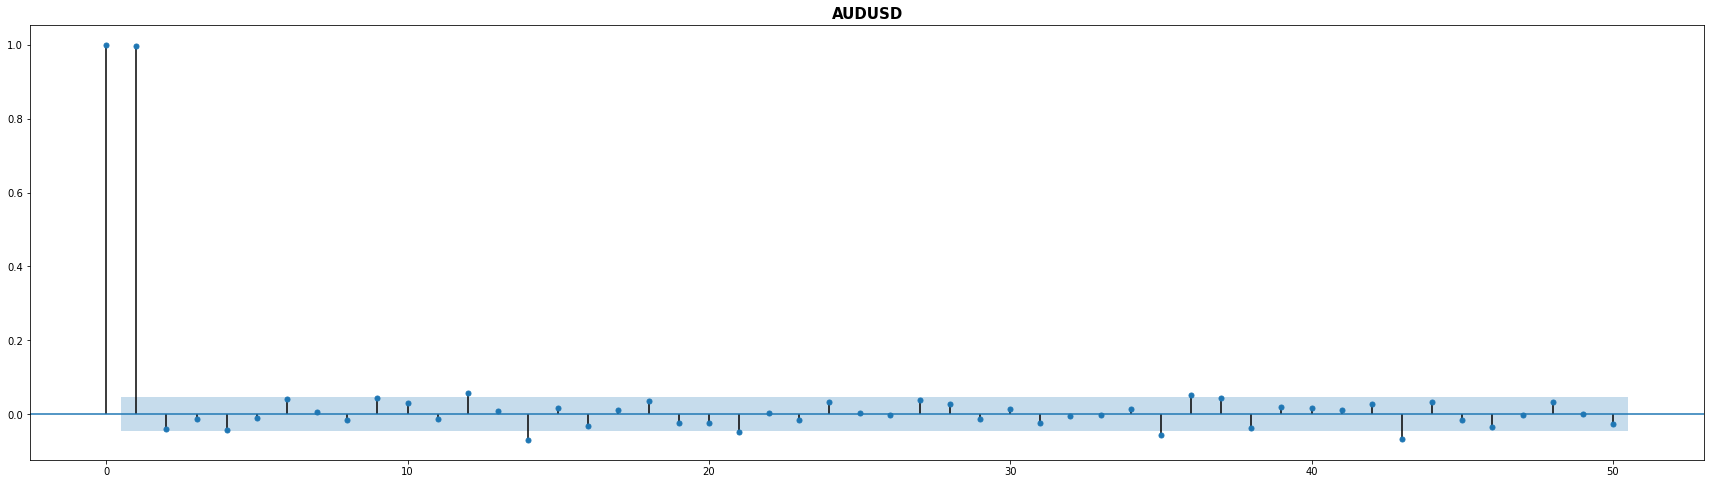

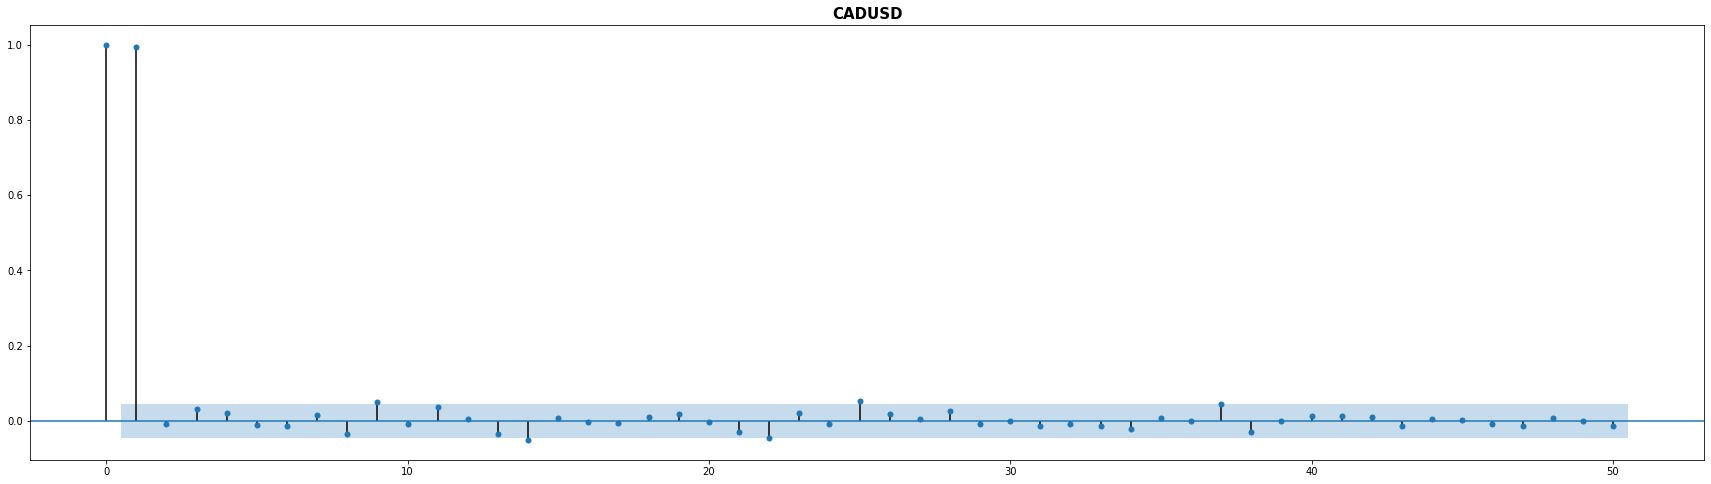

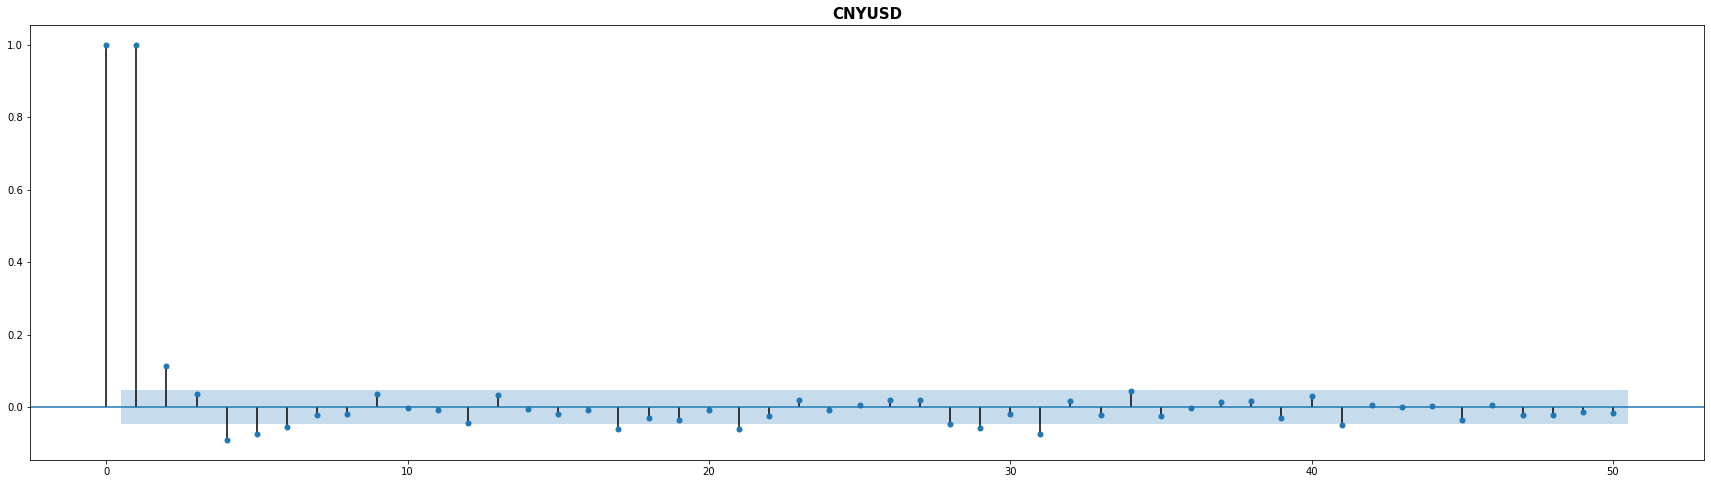

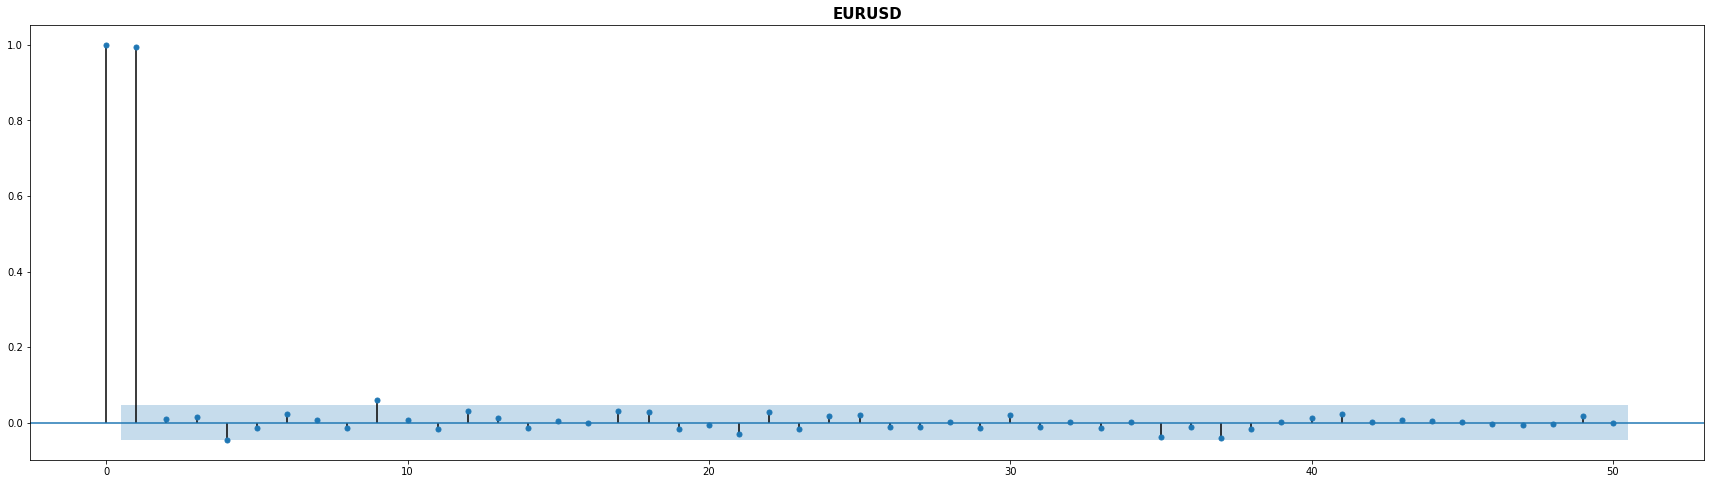

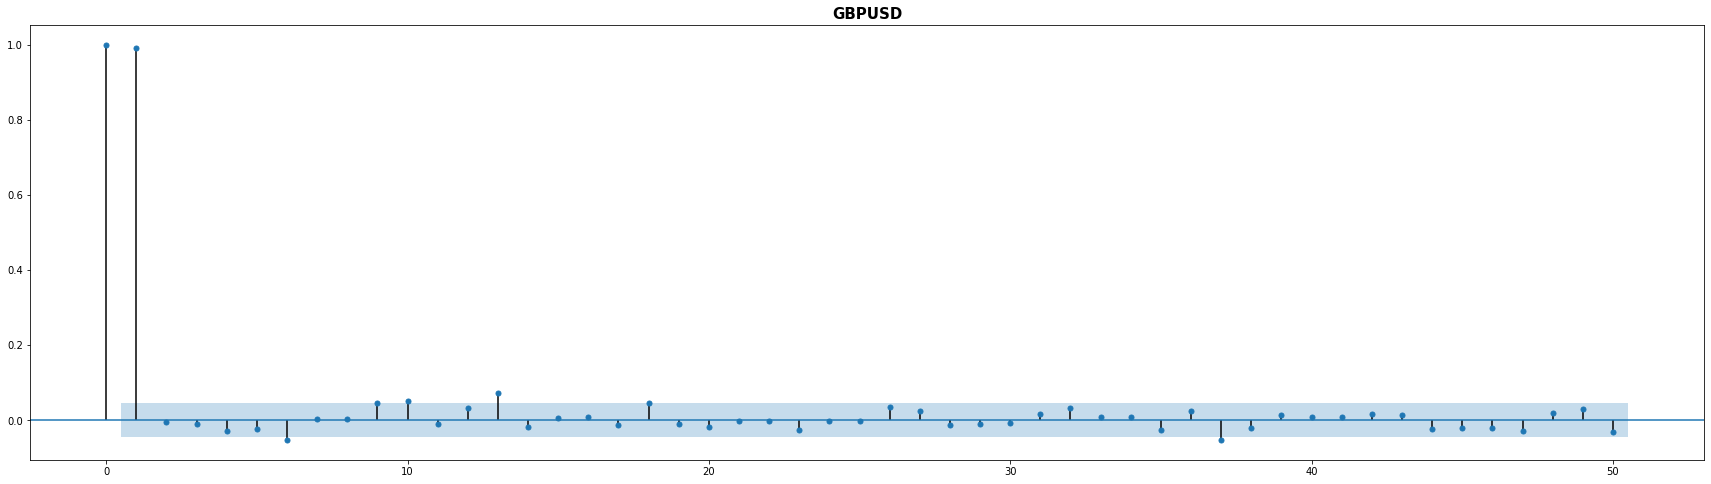

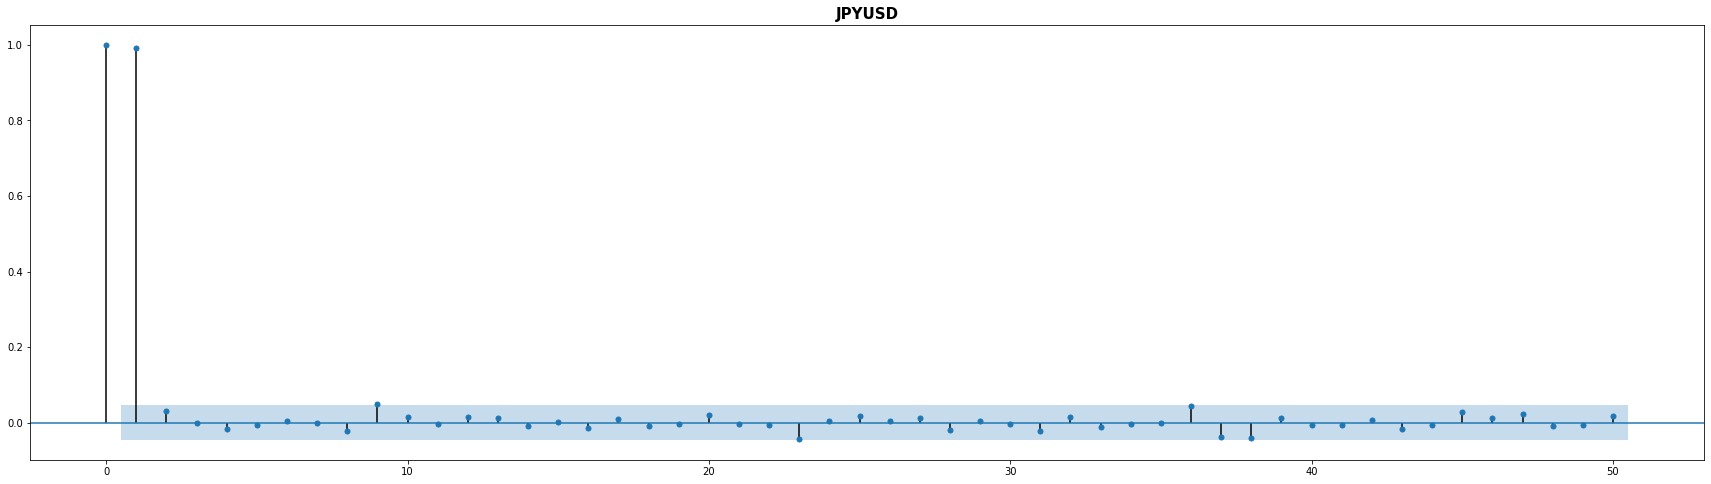

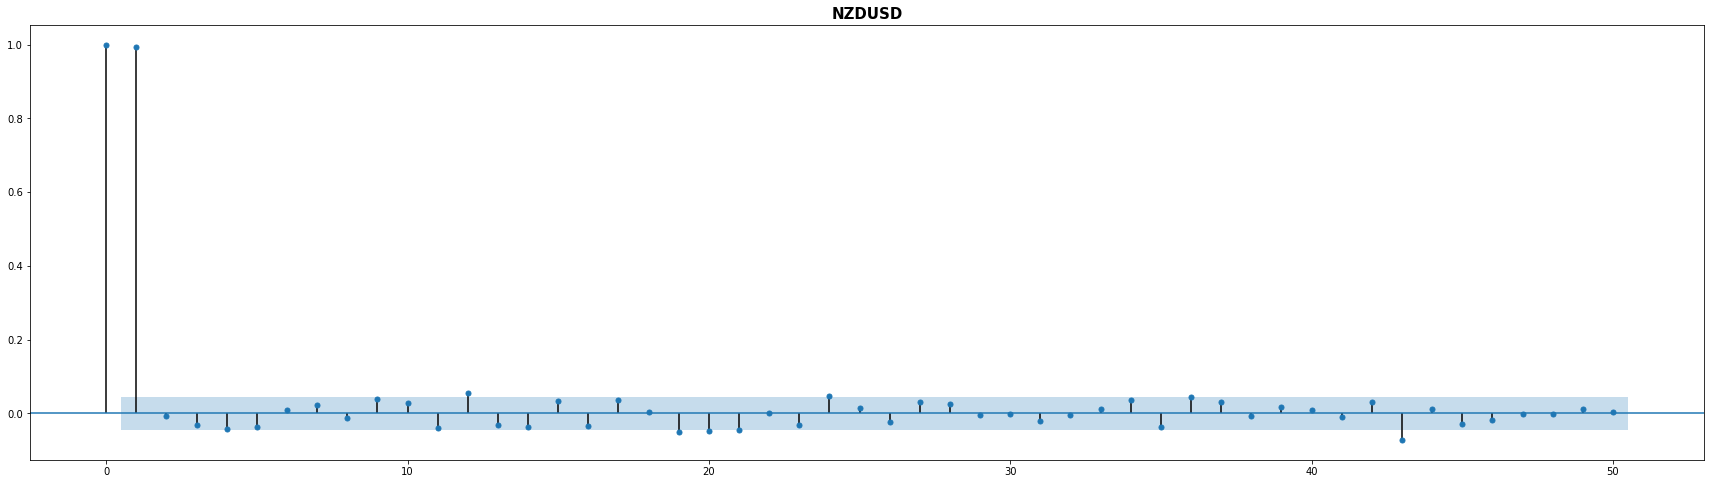

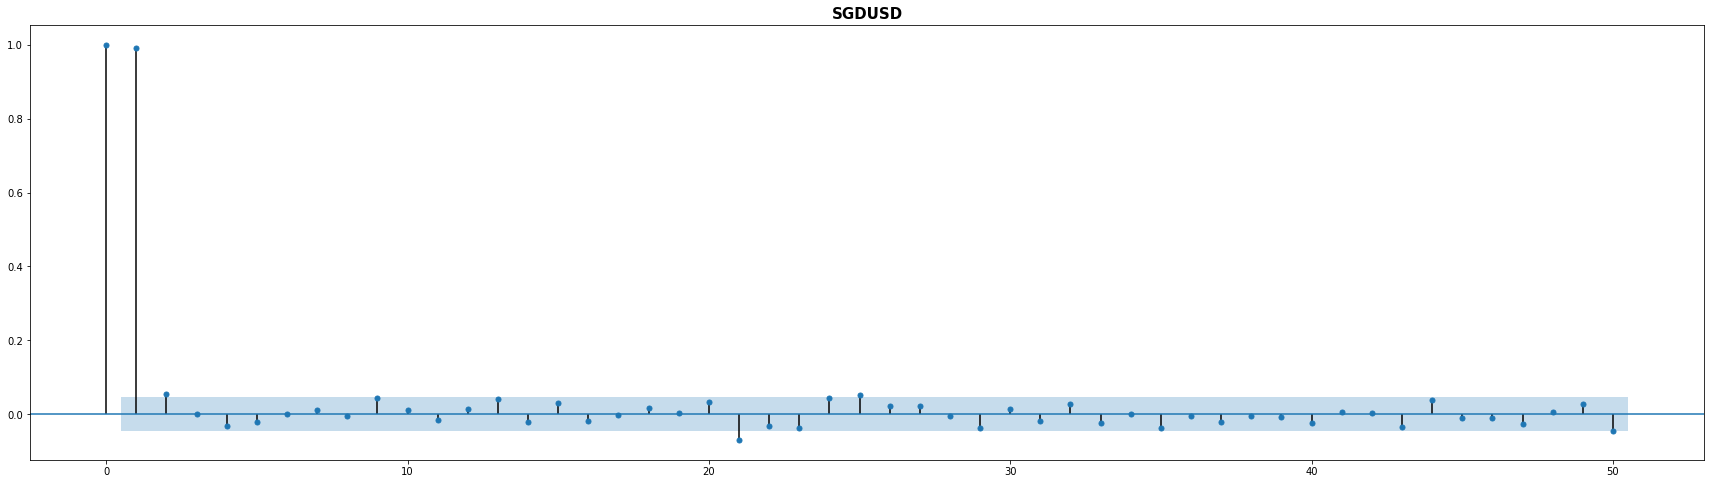

In [ ]:
import statsmodels.api as sm

column_list=df.columns

#colour =['black','blue','green','grey','yellow','violet','orange','red','brown']
for i in range(len(column_list)):
  plt.rcParams["figure.figsize"] = (30,8)
  sm.graphics.tsa.plot_pacf(df[column_list[i]], lags=50);
  plt.title(column_list[i],fontweight="bold",fontsize = 15)
  #plt.xlabel = 'Date'
  #plt.ylabel = 'price in'+ column_list[i]
  plt.show()


The above graph shows that by differecing the series by count 1, we can convert the serires to be stationary.

Lets find different descriptive statistis for each time series variables

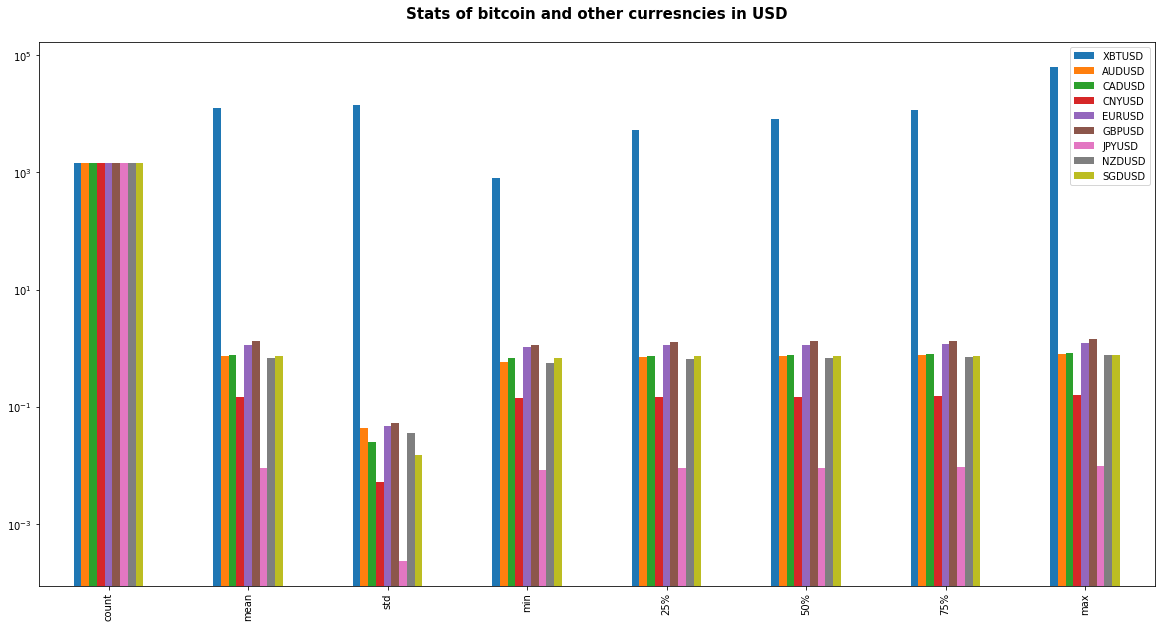

In [ ]:
df_des=df.head(1468).describe()

df_des.plot(kind='bar',logy=True,figsize=(20,10)) 
plt.title('Stats of bitcoin and other curresncies in USD\n',fontweight="bold",fontsize = 15)
plt.legend(loc='best')
plt.show()

In [ ]:
df_des

XBTUSD       AUDUSD       CADUSD       CNYUSD       EURUSD  \
count   1468.000000  1468.000000  1468.000000  1468.000000  1468.000000   
mean   12683.688624     0.729838     0.765766     0.148230     1.151145   
std    13830.046185     0.043420     0.025597     0.005239     0.047459   
min      789.110000     0.574300     0.689100     0.139300     1.040500   
25%     5315.215000     0.699400     0.750500     0.144305     1.115000   
50%     8275.430000     0.733800     0.761600     0.146980     1.150750   
75%    11366.915000     0.766300     0.783325     0.152850     1.186400   
max    63410.290000     0.811000     0.830900     0.159510     1.251000   

            GBPUSD       JPYUSD       NZDUSD       SGDUSD  
count  1468.000000  1468.000000  1468.000000  1468.000000  
mean      1.308149     0.009158     0.682321     0.733322  
std       0.053697     0.000236     0.035644     0.015377  
min       1.148500     0.008493     0.570000     0.684900  
25%       1.272475     0.008986     0.657975     0.723800  
50%       1.303500     0.009142     0.684600     0.734400  
75%       1.339825     0.009322     0.714525     0.743300  
max       1.433900     0.009768     0.752000     0.765000

Elpore more about each variables

In [ ]:
df_new=save_df
df_new.dtypes

Date      datetime64[ns]
XBTUSD           float64
AUDUSD           float64
CADUSD           float64
CNYUSD           float64
EURUSD           float64
GBPUSD           float64
JPYUSD           float64
NZDUSD           float64
SGDUSD           float64
dtype: object

Extract Day, Month, Year from Date column and append to existing dataframe

In [ ]:
df_new['year']=pd.DatetimeIndex(df_new['Date']).year
df_new['Month']=pd.DatetimeIndex(df_new['Date']).month
df_new['Day']=pd.DatetimeIndex(df_new['Date']).day

In [ ]:
df_new

Date    XBTUSD  AUDUSD  CADUSD   CNYUSD  EURUSD  GBPUSD    JPYUSD  \
0    2017-01-03   1024.38  0.7219  0.7448  0.14385  1.0405  1.2237  0.008493   
1    2017-01-04   1091.66  0.7283  0.7519  0.14504  1.0489  1.2323  0.008529   
2    2017-01-05    971.26  0.7338  0.7562  0.14547  1.0607  1.2419  0.008669   
3    2017-01-06    898.16  0.7301  0.7555  0.14424  1.0532  1.2287  0.008547   
4    2017-01-08    917.41  0.7301  0.7555  0.14424  1.0532  1.2287  0.008547   
...         ...       ...     ...     ...      ...     ...     ...       ...   
1831 2022-07-17  20930.58  0.6793  0.7678  0.14799  1.0080  1.1855  0.007220   
1832 2022-07-18  21487.97  0.6812  0.7701  0.14830  1.0143  1.1953  0.007240   
1833 2022-07-19  23304.71  0.6897  0.7770  0.14827  1.0227  1.1995  0.007236   
1834 2022-07-20  23258.12  0.6888  0.7762  0.14805  1.0180  1.1973  0.007235   
1835 2022-07-21  22848.73  0.6874  0.7748  0.14787  1.0199  1.1943  0.007211   

      NZDUSD  SGDUSD  year  Month  Day  
0     0.6918  0.6895  2017      1    3  
1     0.6970  0.6948  2017      1    4  
2     0.7026  0.7001  2017      1    5  
3     0.6960  0.6950  2017      1    6  
4     0.6960  0.6950  2017      1    8  
...      ...     ...   ...    ...  ...  
1831  0.6165  0.7144  2022      7   17  
1832  0.6154  0.7156  2022      7   18  
1833  0.6225  0.7181  2022      7   19  
1834  0.6239  0.7176  2022      7   20  
1835  0.6202  0.7185  2022      7   21  

[1836 rows x 13 columns]

Compute yearly mean, max, min for each variable 

In [ ]:
columns=df_new.columns[1:10]
columns 

Index(['XBTUSD', 'AUDUSD', 'CADUSD', 'CNYUSD', 'EURUSD', 'GBPUSD', 'JPYUSD',
       'NZDUSD', 'SGDUSD'],
      dtype='object')

In [ ]:
########## ONLY in Colab ##########
!pip3 install pyspark
########## ONLY in Colab ##########
from pyspark.sql import SparkSession
spark = SparkSession.builder.master("local[*]").appName('Group19').getOrCreate()

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 281.3 MB 57 kB/s 
     |████████████████████████████████| 199 kB 97.2 MB/s 
  Created wheel for pyspark: filename=pyspark-3.3.0-py2.py3-none-any.whl size=281764026 sha256=97b918b1577f13d06d3a5df9537f9b47806e4157887db6d0067c788cc1b9ee89
  Stored in directory: /root/.cache/pip/wheels/7a/8e/1b/f73a52650d2e5f337708d9f6a1750d451a7349a867f928b885
Successfully built pyspark


In [ ]:
spark_df=spark.createDataFrame(df_new)

In [ ]:
Yearly_mean=spark_df.select('XBTUSD', 'AUDUSD', 'CADUSD', 'CNYUSD', 'EURUSD', 'GBPUSD', 'JPYUSD',
       'NZDUSD','SGDUSD','Year' ).groupby('Year').mean().orderBy('Year')
Yearly_mean.show()


yearly_mean_pd=Yearly_mean.toPandas()
yearly_mean_pd

+----+------------------+------------------+------------------+-------------------+------------------+------------------+--------------------+------------------+------------------+---------+
|Year|       avg(XBTUSD)|       avg(AUDUSD)|       avg(CADUSD)|        avg(CNYUSD)|       avg(EURUSD)|       avg(GBPUSD)|         avg(JPYUSD)|       avg(NZDUSD)|       avg(SGDUSD)|avg(Year)|
+----+------------------+------------------+------------------+-------------------+------------------+------------------+--------------------+------------------+------------------+---------+
|2017|3838.4039464882935|0.7669143812709036|0.7704879598662211|0.14802963210702338|1.1282668896321062|1.2874026755852837|0.008917929765886295|0.7114387959866227|0.7241040133779264|   2017.0|
|2018| 7556.433495145635|0.7480906148867315|0.7722902912621353| 0.1514344660194176| 1.181367313915858|1.3357226537216824|0.009058711974110024|0.6926084142394819|0.7416071197410999|   2018.0|
|2019| 7392.790836120401|0.6952424749163886|0

Year   avg(XBTUSD)  avg(AUDUSD)  avg(CADUSD)  avg(CNYUSD)  avg(EURUSD)  \
0  2017   3838.403946     0.766914     0.770488     0.148030     1.128267   
1  2018   7556.433495     0.748091     0.772290     0.151434     1.181367   
2  2019   7392.790836     0.695242     0.753872     0.144797     1.119255   
3  2020  11135.980193     0.690723     0.746188     0.145034     1.142008   
4  2021  47396.041534     0.751212     0.797875     0.155009     1.182987   
5  2022  35184.989356     0.715455     0.784888     0.153839     1.085618   

   avg(GBPUSD)  avg(JPYUSD)  avg(NZDUSD)  avg(SGDUSD)  avg(Year)  
0     1.287403     0.008918     0.711439     0.724104     2017.0  
1     1.335723     0.009059     0.692608     0.741607     2018.0  
2     1.277415     0.009172     0.659174     0.733158     2019.0  
3     1.283374     0.009372     0.650479     0.725122     2020.0  
4     1.375652     0.009112     0.707302     0.744201     2021.0  
5     1.288292     0.008069     0.658716     0.730784     2022.0

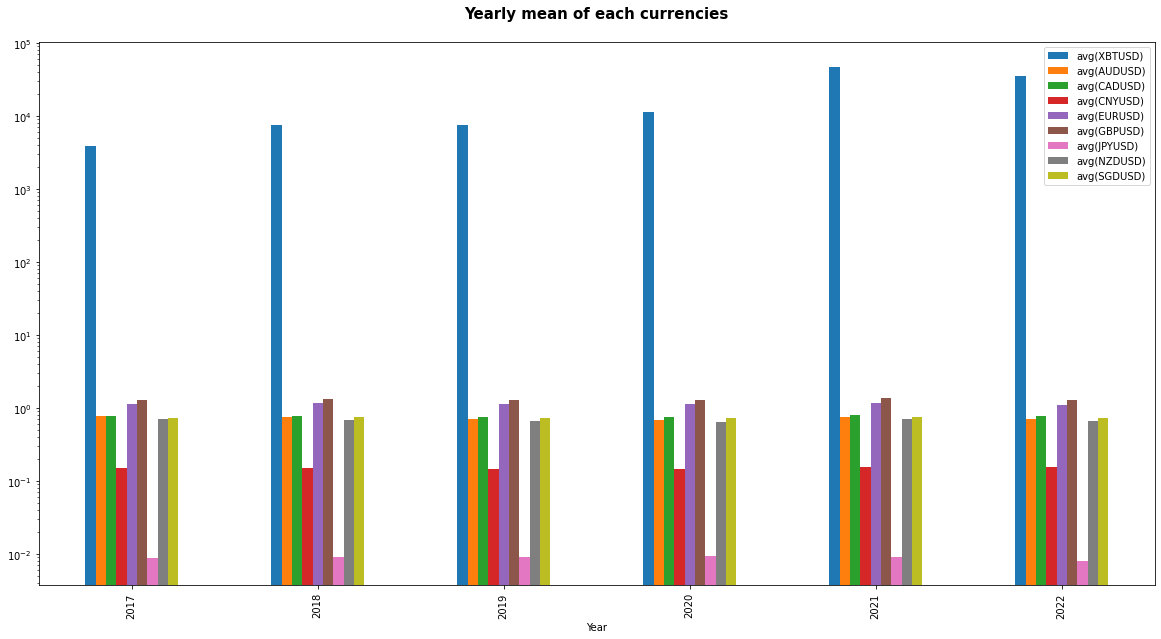

In [ ]:
yearly_mean_pd.plot(kind='bar',logy=True,x='Year', y=yearly_mean_pd.columns[1:10],figsize=(20,10)) 
plt.title('Yearly mean of each currencies\n',fontweight="bold",fontsize = 15)
plt.legend(loc='best')
plt.show()



+----+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+---------+
|Year|max(XBTUSD)|max(AUDUSD)|max(CADUSD)|max(CNYUSD)|max(EURUSD)|max(GBPUSD)|max(JPYUSD)|max(NZDUSD)|max(SGDUSD)|max(Year)|
+----+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+---------+
|2017|   19041.63|      0.806|     0.8258|    0.15415|     1.2036|      1.358|   0.009273|      0.752|     0.7486|     2017|
|2018|   16753.24|      0.811|     0.8152|    0.15951|      1.251|     1.4339|   0.009547|     0.7407|      0.765|     2018|
|2019|   12733.71|     0.7273|     0.7698|    0.14954|     1.1543|     1.3338|   0.009496|     0.6916|      0.743|     2019|
|2020|   28996.28|     0.7694|     0.7874|     0.1533|     1.2298|      1.367|   0.009768|     0.7203|     0.7569|     2020|
|2021|   67734.04|     0.7968|     0.8309|    0.15762|     1.2327|     1.4212|   0.009735|     0.7436|      0.759|     2021|


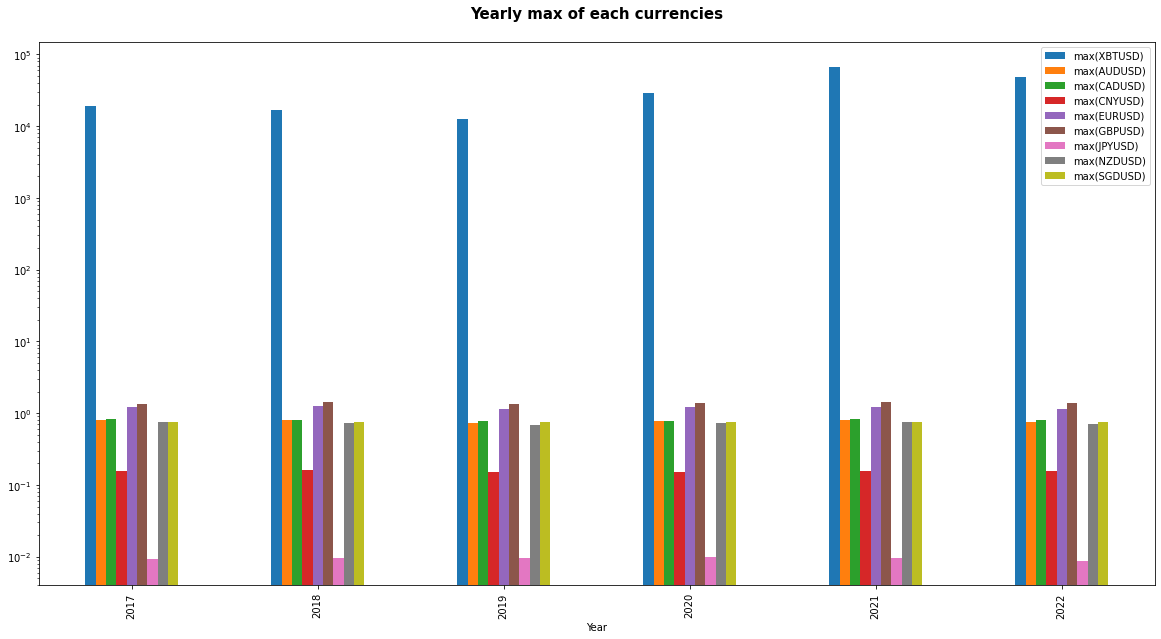

In [ ]:

Yearly_max=spark_df.select('XBTUSD', 'AUDUSD', 'CADUSD', 'CNYUSD', 'EURUSD', 'GBPUSD', 'JPYUSD',
       'NZDUSD','SGDUSD','Year' ).groupby('Year').max().orderBy('Year')
Yearly_max.show()


yearly_max_pd=Yearly_max.toPandas()
yearly_max_pd

yearly_max_pd.plot(kind='bar',logy=True,x='Year', y=yearly_max_pd.columns[1:10],figsize=(20,10)) 
plt.title('Yearly max of each currencies\n',fontweight="bold",fontsize = 15)
plt.legend(loc='best')
plt.show()

+----+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+---------+
|Year|min(XBTUSD)|min(AUDUSD)|min(CADUSD)|min(CNYUSD)|min(EURUSD)|min(GBPUSD)|min(JPYUSD)|min(NZDUSD)|min(SGDUSD)|min(Year)|
+----+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+---------+
|2017|     789.11|     0.7219|     0.7273|    0.14385|     1.0405|     1.2047|   0.008493|     0.6809|     0.6895|     2017|
|2018|    3156.89|     0.7033|     0.7332|    0.14335|     1.1218|     1.2487|   0.008731|     0.6443|     0.7217|     2018|
|2019|    3358.91|     0.6704|     0.7337|     0.1393|     1.0899|     1.2033|   0.008913|     0.6245|     0.7191|     2019|
|2020|    4904.48|     0.5743|     0.6891|    0.13953|     1.0688|     1.1485|   0.008921|       0.57|     0.6849|     2020|
|2021|   29250.59|     0.7001|     0.7727|    0.15217|     1.1199|     1.3204|   0.008665|     0.6713|     0.7288|     2021|


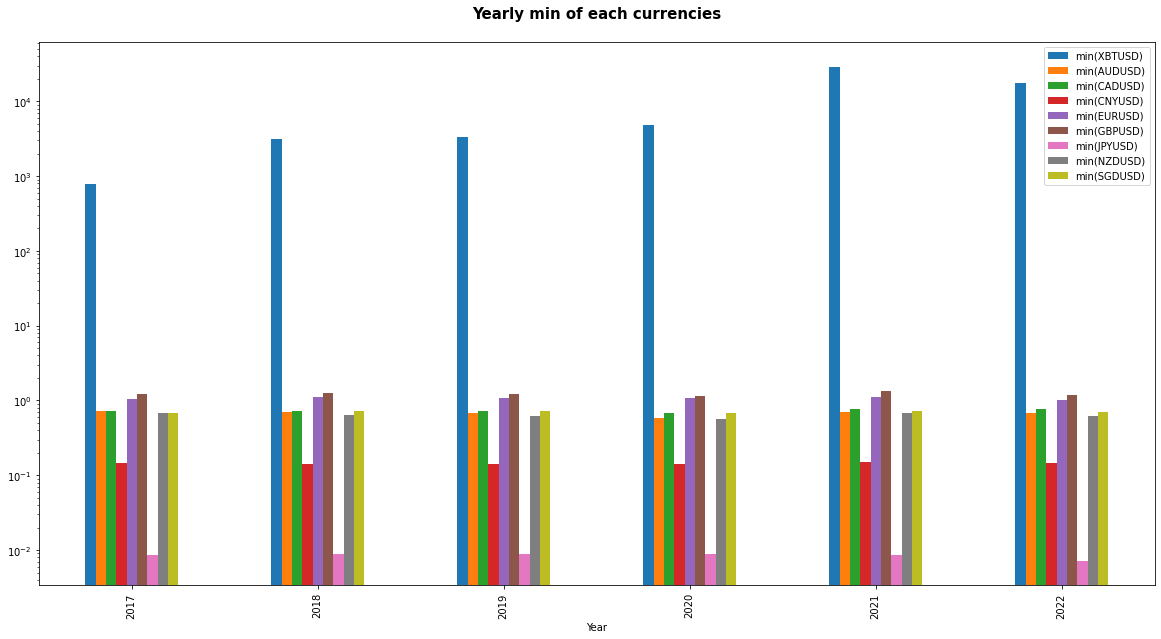

In [ ]:
Yearly_min=spark_df.select('XBTUSD', 'AUDUSD', 'CADUSD', 'CNYUSD', 'EURUSD', 'GBPUSD', 'JPYUSD',
       'NZDUSD','SGDUSD','Year' ).groupby('Year').min().orderBy('Year')
Yearly_min.show()


yearly_min_pd=Yearly_min.toPandas()
yearly_min_pd

yearly_min_pd.plot(kind='bar',logy=True,x='Year', y=yearly_min_pd.columns[1:10],figsize=(20,10)) 
plt.title('Yearly min of each currencies\n',fontweight="bold",fontsize = 15)
plt.legend(loc='best')
plt.show()

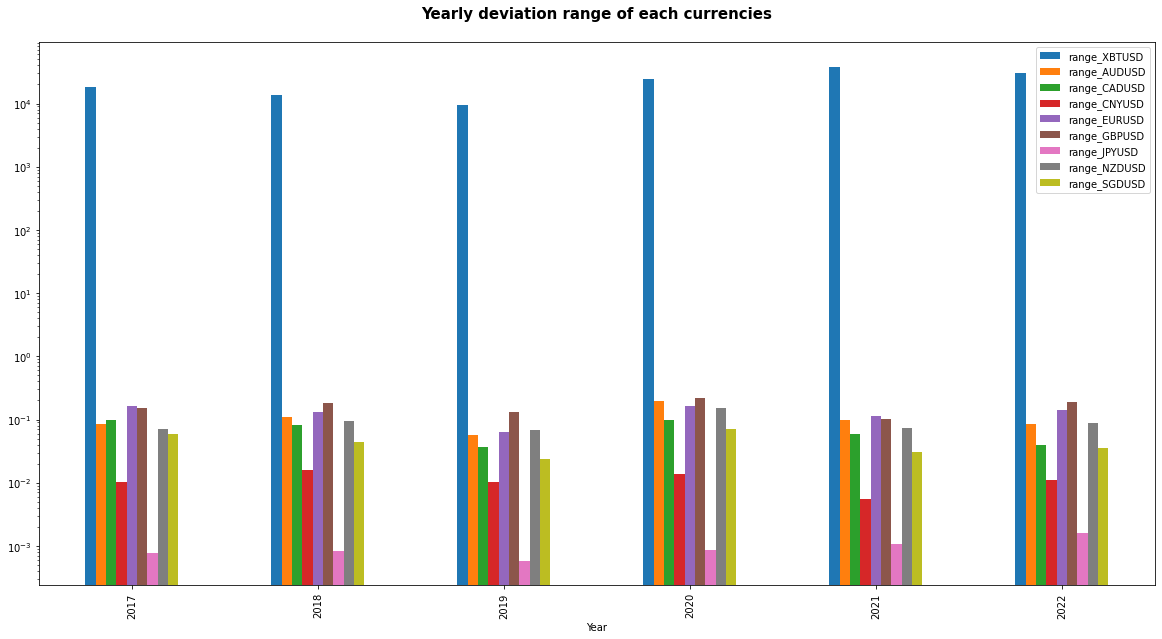

range_XBTUSD  range_AUDUSD  range_CADUSD  range_CNYUSD  range_EURUSD  \
Year                                                                         
2017      18252.52        0.0841        0.0985       0.01030        0.1631   
2018      13596.35        0.1077        0.0820       0.01616        0.1292   
2019       9374.80        0.0569        0.0361       0.01024        0.0644   
2020      24091.80        0.1951        0.0983       0.01377        0.1610   
2021      38483.45        0.0967        0.0582       0.00545        0.1128   
2022      30182.47        0.0845        0.0391       0.01121        0.1437   

      range_GBPUSD  range_JPYUSD  range_NZDUSD  range_SGDUSD  
Year                                                          
2017        0.1533      0.000780        0.0711        0.0591  
2018        0.1852      0.000816        0.0964        0.0433  
2019        0.1305      0.000583        0.0671        0.0239  
2020        0.2185      0.000847        0.1503        0.0720  
2021        0.1008      0.001070        0.0723        0.0302  
2022        0.1882      0.001600        0.0867        0.0349

In [ ]:
yearly_max_arr=yearly_max_pd[yearly_max_pd.columns[1:10]].values
yearly_min_arr=yearly_min_pd[yearly_min_pd.columns[1:10]].values
yearly_range_arr=yearly_max_arr-yearly_min_arr 
yearly_range_pd=pd.DataFrame(yearly_range_arr)

yearly_range_pd.columns=[ 'range_XBTUSD', 'range_AUDUSD', 'range_CADUSD', 'range_CNYUSD', 'range_EURUSD', 'range_GBPUSD', 'range_JPYUSD',
       'range_NZDUSD','range_SGDUSD']
#yearly_range_pd
yearly_range_pd['Year']=yearly_min_pd['Year']
yearly_range_pd=yearly_range_pd.set_index('Year')

yearly_range_pd.plot(kind='bar',logy=True,y=yearly_range_pd.columns,figsize=(20,10)) 
plt.title('Yearly deviation range of each currencies\n',fontweight="bold",fontsize = 15)
plt.legend(loc='best')
plt.show()
yearly_range_pd


We can see that Bitcoin price was at hightest during 2021 though other currencies remained nearly the same rate.

Lets concentrate on 2021

In [ ]:
df_2021=spark_df.select('Date','XBTUSD', 'AUDUSD', 'CADUSD', 'CNYUSD', 'EURUSD', 'GBPUSD', 'JPYUSD',
       'NZDUSD','SGDUSD').filter('Year=2021')
df_2021.show()

+-------------------+--------+------+------+-------+------+------+--------+------+------+
|               Date|  XBTUSD|AUDUSD|CADUSD| CNYUSD|EURUSD|GBPUSD|  JPYUSD|NZDUSD|SGDUSD|
+-------------------+--------+------+------+-------+------+------+--------+------+------+
|2021-01-01 00:00:00|29250.59|0.7694|0.7857|0.15321|1.2215|1.3672| 0.00969|0.7188|0.7565|
|2021-01-02 00:00:00|31702.36|0.7694|0.7857|0.15321|1.2215|1.3672| 0.00969|0.7188|0.7565|
|2021-01-03 00:00:00|33591.73|0.7694|0.7857|0.15321|1.2215|1.3672| 0.00969|0.7188|0.7565|
|2021-01-04 00:00:00|31037.38|0.7665|0.7827|0.15476|1.2248|1.3571|0.009696|0.7176|0.7573|
|2021-01-05 00:00:00|33792.24|0.7759|0.7892|0.15489|1.2298|1.3627|0.009735|0.7252| 0.759|
|2021-01-06 00:00:00|35939.27|0.7802|0.7887|0.15473|1.2327|1.3608|0.009704|0.7294|0.7589|
|2021-01-07 00:00:00| 39733.0|0.7769|0.7881|0.15437|1.2272|1.3568|0.009632|0.7255|0.7549|
|2021-01-08 00:00:00| 40040.7|0.7757|0.7881|0.15445|1.2218|1.3568|0.009619|0.7242|0.7545|
|2021-01-0

Lets plot the data for 2021

In [ ]:
df_2021_pd=df_2021.toPandas()
df_2021_cols=df_2021_pd.columns
df_2021_cols

Index(['Date', 'XBTUSD', 'AUDUSD', 'CADUSD', 'CNYUSD', 'EURUSD', 'GBPUSD',
       'JPYUSD', 'NZDUSD', 'SGDUSD'],
      dtype='object')

In [ ]:
df_2021_pd1=df_2021_pd.set_index('Date')

In [ ]:
df_2021_pd1

XBTUSD  AUDUSD  CADUSD   CNYUSD  EURUSD  GBPUSD    JPYUSD  \
Date                                                                      
2021-01-01  29250.59  0.7694  0.7857  0.15321  1.2215  1.3672  0.009690   
2021-01-02  31702.36  0.7694  0.7857  0.15321  1.2215  1.3672  0.009690   
2021-01-03  33591.73  0.7694  0.7857  0.15321  1.2215  1.3672  0.009690   
2021-01-04  31037.38  0.7665  0.7827  0.15476  1.2248  1.3571  0.009696   
2021-01-05  33792.24  0.7759  0.7892  0.15489  1.2298  1.3627  0.009735   
...              ...     ...     ...      ...     ...     ...       ...   
2021-12-27  50989.10  0.7239  0.7818  0.15696  1.1328  1.3441  0.008704   
2021-12-28  47561.31  0.7229  0.7800  0.15702  1.1310  1.3434  0.008710   
2021-12-29  47232.15  0.7250  0.7819  0.15704  1.1349  1.3490  0.008698   
2021-12-30  47298.35  0.7256  0.7850  0.15691  1.1325  1.3499  0.008691   
2021-12-31  46333.65  0.7263  0.7912  0.15733  1.1370  1.3532  0.008687   

            NZDUSD  SGDUSD  
Date                        
2021-01-01  0.7188  0.7565  
2021-01-02  0.7188  0.7565  
2021-01-03  0.7188  0.7565  
2021-01-04  0.7176  0.7573  
2021-01-05  0.7252  0.7590  
...            ...     ...  
2021-12-27  0.6814  0.7370  
2021-12-28  0.6805  0.7384  
2021-12-29  0.6830  0.7395  
2021-12-30  0.6832  0.7396  
2021-12-31  0.6826  0.7415  

[365 rows x 9 columns]

In [ ]:
scaler1=StandardScaler()
scaled_Df1=scaler1.fit_transform(df_2021_pd1)
s_Df2=pd.DataFrame(scaled_Df1)
s_Df2=s_Df2.rolling(30).mean().dropna()
s_Df2

0         1         2         3         4         5         6  \
29  -1.292089  0.927106 -0.879832 -0.494662  1.218643 -0.495648  2.094420   
30  -1.280686  0.919629 -0.887212 -0.428487  1.209257 -0.490438  2.075707   
31  -1.274007  0.908712 -0.906646 -0.389064  1.190841 -0.491741  2.054339   
32  -1.266873  0.895701 -0.914764 -0.342601  1.170525 -0.492320  2.032573   
33  -1.245576  0.888673 -0.915994 -0.342883  1.145337 -0.481320  2.009347   
..        ...       ...       ...       ...       ...       ...       ...   
360  0.320774 -1.670844 -1.240717  1.633915 -1.885902 -2.041339 -1.244143   
361  0.290891 -1.654992 -1.244899  1.651093 -1.886734 -2.027300 -1.258875   
362  0.253165 -1.638990 -1.252772  1.665172 -1.879843 -2.001973 -1.273474   
363  0.219674 -1.619699 -1.246621  1.659259 -1.881387 -1.973028 -1.292984   
364  0.183272 -1.596070 -1.219069  1.667707 -1.875447 -1.936412 -1.316874   

            7         8  
29   0.840345  1.308589  
30   0.841516  1.291029  
31   0.834492  1.263371  
32   0.835429  1.237908  
33   0.843155  1.206738  
..        ...       ...  
360 -2.010328 -1.562116  
361 -2.014308 -1.519971  
362 -2.013138 -1.481338  
363 -2.010797 -1.452363  
364 -2.006816 -1.413730  

[336 rows x 9 columns]

In [ ]:
s_Df2_values=pd.DataFrame(s_Df2) 
s_Df2_values['Date']=save_df['Date']
s_Df2_values.columns=['XBTUSD', 'AUDUSD', 'CADUSD', 'CNYUSD', 'EURUSD', 'GBPUSD', 'JPYUSD',
       'NZDUSD', 'SGDUSD','Date']
s_Df2_values.set_index('Date',drop=True)

In [ ]:
df_2021_pd1

XBTUSD  AUDUSD  CADUSD   CNYUSD  EURUSD  GBPUSD    JPYUSD  \
Date                                                                      
2021-01-01  29250.59  0.7694  0.7857  0.15321  1.2215  1.3672  0.009690   
2021-01-02  31702.36  0.7694  0.7857  0.15321  1.2215  1.3672  0.009690   
2021-01-03  33591.73  0.7694  0.7857  0.15321  1.2215  1.3672  0.009690   
2021-01-04  31037.38  0.7665  0.7827  0.15476  1.2248  1.3571  0.009696   
2021-01-05  33792.24  0.7759  0.7892  0.15489  1.2298  1.3627  0.009735   
...              ...     ...     ...      ...     ...     ...       ...   
2021-12-27  50989.10  0.7239  0.7818  0.15696  1.1328  1.3441  0.008704   
2021-12-28  47561.31  0.7229  0.7800  0.15702  1.1310  1.3434  0.008710   
2021-12-29  47232.15  0.7250  0.7819  0.15704  1.1349  1.3490  0.008698   
2021-12-30  47298.35  0.7256  0.7850  0.15691  1.1325  1.3499  0.008691   
2021-12-31  46333.65  0.7263  0.7912  0.15733  1.1370  1.3532  0.008687   

            NZDUSD  SGDUSD  
Date                        
2021-01-01  0.7188  0.7565  
2021-01-02  0.7188  0.7565  
2021-01-03  0.7188  0.7565  
2021-01-04  0.7176  0.7573  
2021-01-05  0.7252  0.7590  
...            ...     ...  
2021-12-27  0.6814  0.7370  
2021-12-28  0.6805  0.7384  
2021-12-29  0.6830  0.7395  
2021-12-30  0.6832  0.7396  
2021-12-31  0.6826  0.7415  

[365 rows x 9 columns]

In [ ]:
df.columns 

Index(['XBTUSD', 'AUDUSD', 'CADUSD', 'CNYUSD', 'EURUSD', 'GBPUSD', 'JPYUSD',
       'NZDUSD', 'SGDUSD'],
      dtype='object')

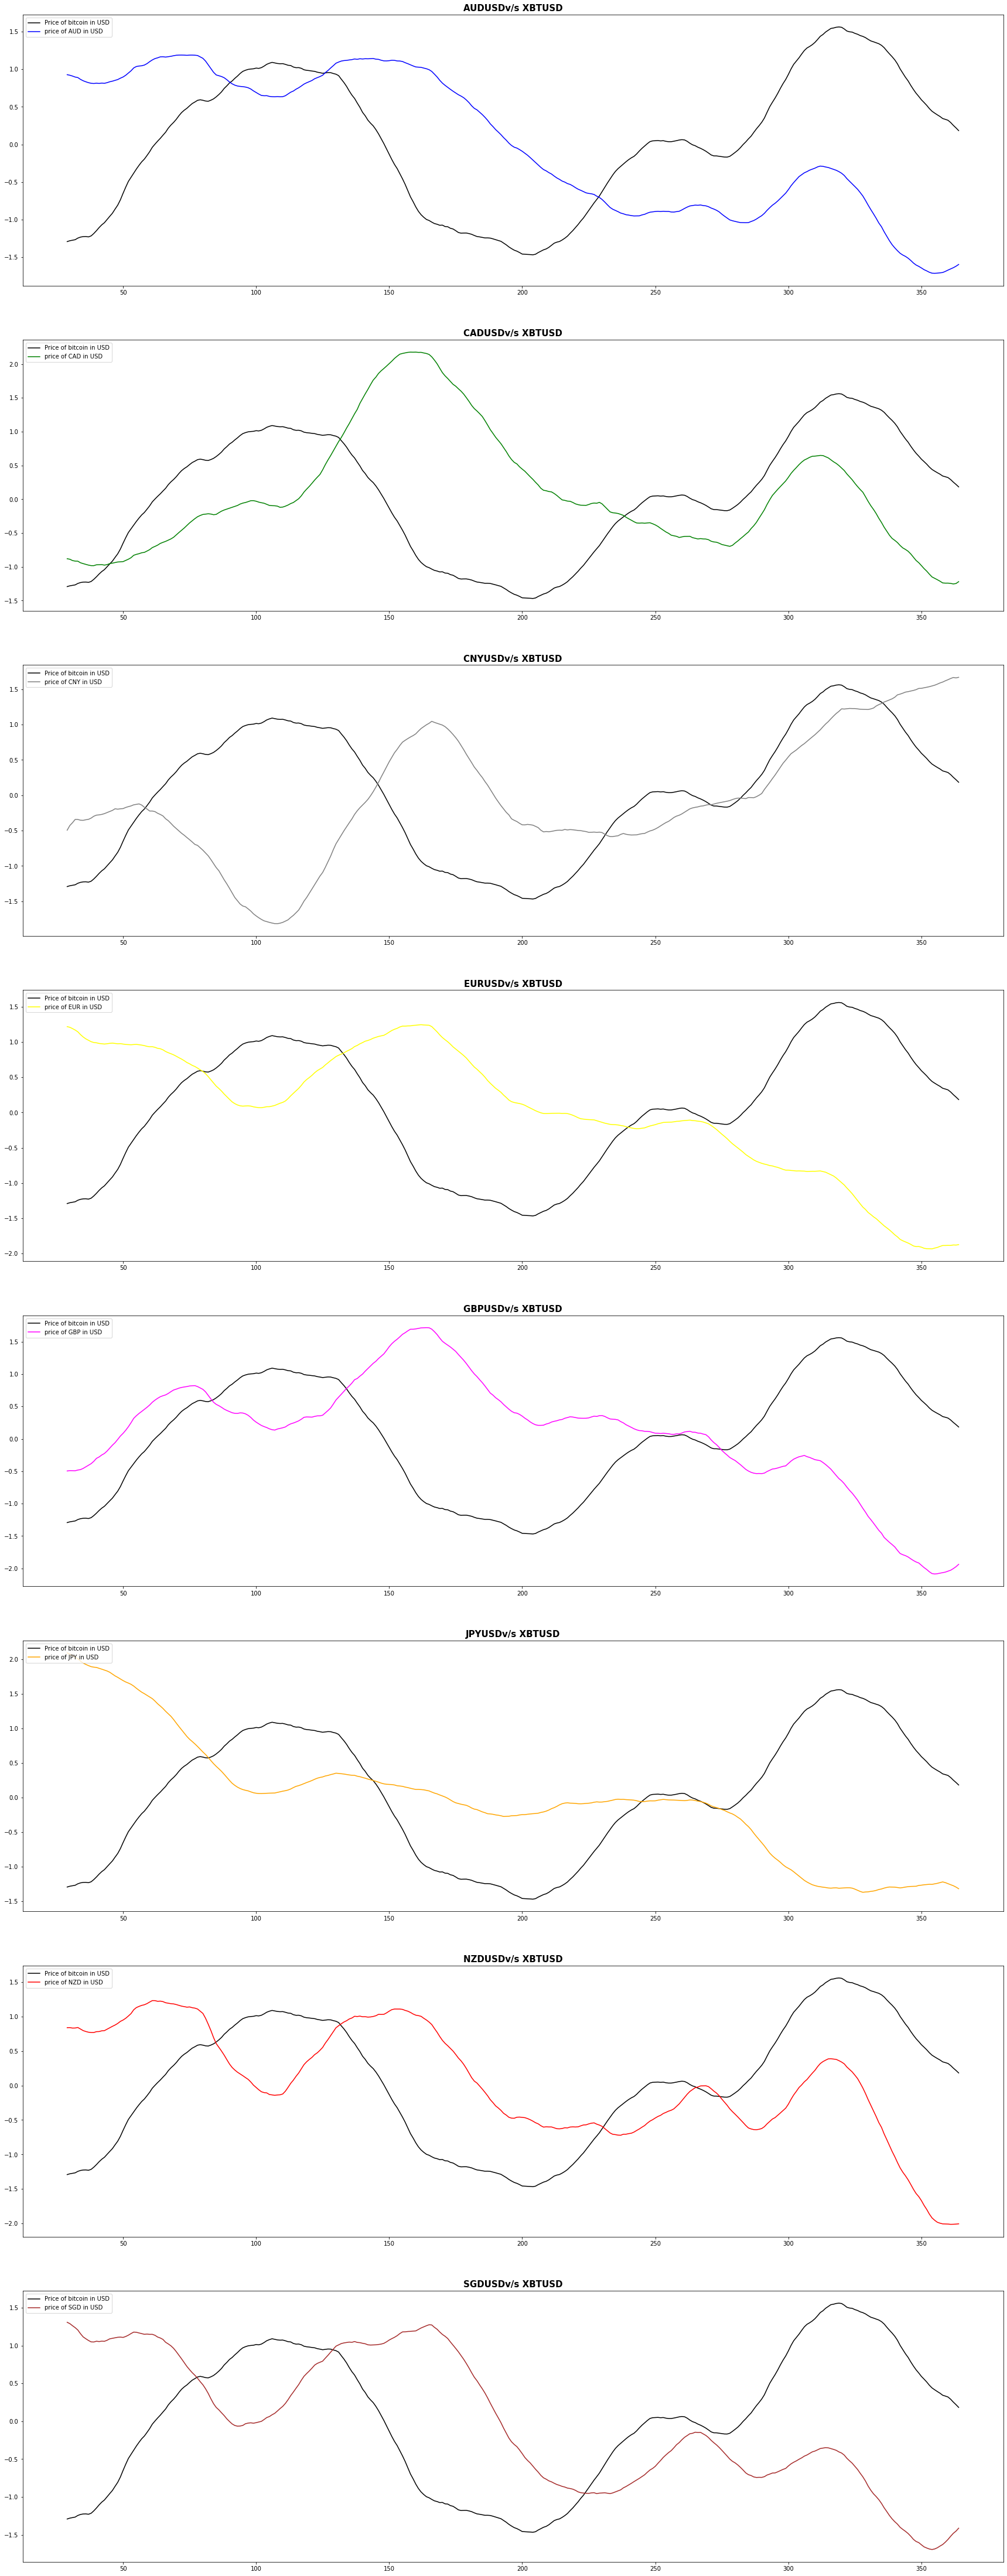

In [ ]:
column_list=df.columns 
colour =['blue','green','grey','yellow','magenta','orange','red','brown']
fig2, axs = plt.subplots(8,figsize=(30, 80))
 

for i in range(len(column_list)-1):
  axs[i].plot(s_Df2_values['XBTUSD'],color='Black',label='Price of bitcoin in USD')
  label2='price of '+ column_list[i+1][0:3] + ' in USD'
  axs[i].plot(s_Df2_values[column_list[i+1]],color=colour[i],label=label2)
  axs[i].figsize=(30,10)
  axs[i].set_title(column_list[i+1] + 'v/s XBTUSD',fontweight="bold",fontsize = 15)
  axs[i].legend(loc="upper left")
  axs[i].xlabel = 'Date'
  axs[i].ylabel = 'prices'


Work on time series resampling technique


In [ ]:
resample_df=df
#resample_df.set_index('Date')

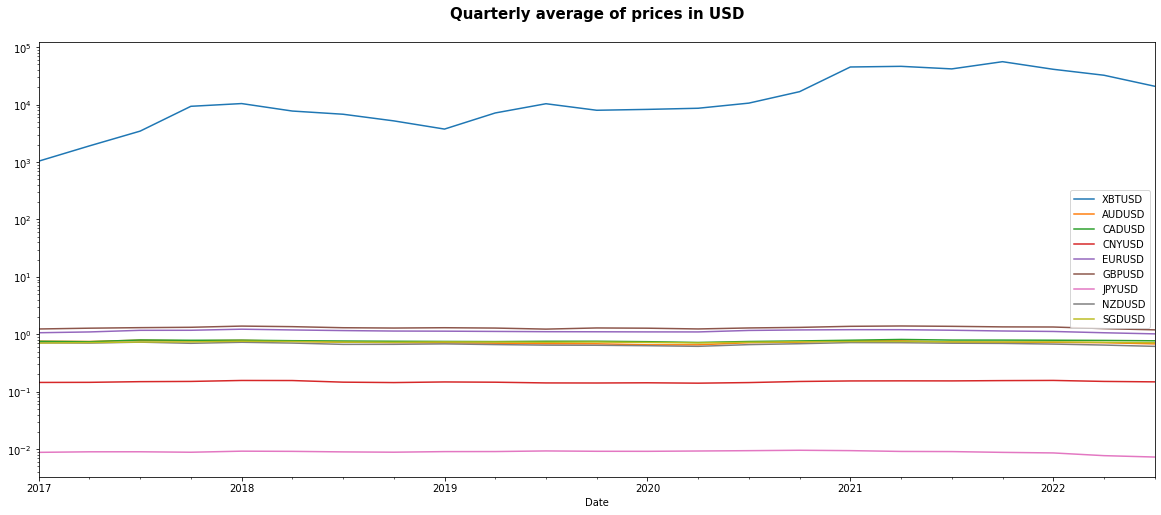

In [ ]:
resample_df_Qmean=resample_df.resample(rule='qs').mean()


resample_df_Qmean.plot(kind='line',logy=True, y=resample_df_Qmean.columns,figsize=(20,8)) 
plt.title('Quarterly average of prices in USD\n',fontweight="bold",fontsize = 15)
plt.legend(loc='best')
plt.show()



The quaterly average graph clearly shows the fluctuating pattern of bitcoin price when compared to other currency rates which are constant iver the time

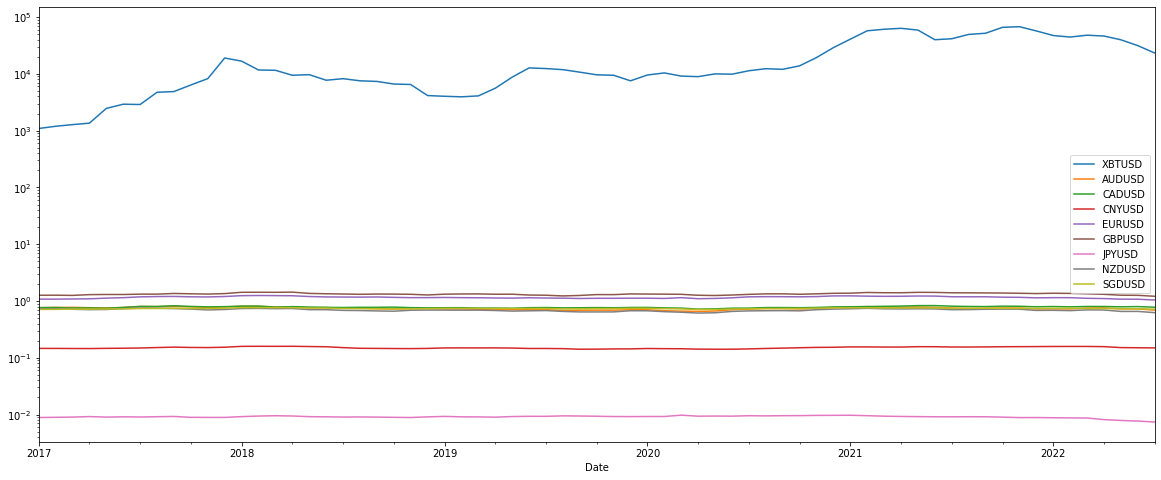

In [ ]:
resample_df_monthlymax=resample_df.resample(rule='M').max()
resample_df_monthlymax.plot(kind='line',logy=True,figsize=(20,8))

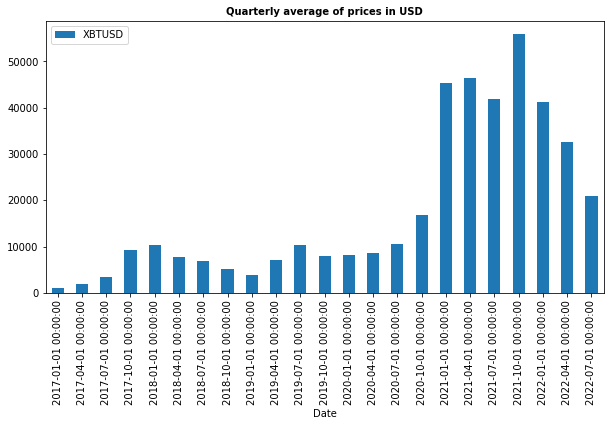

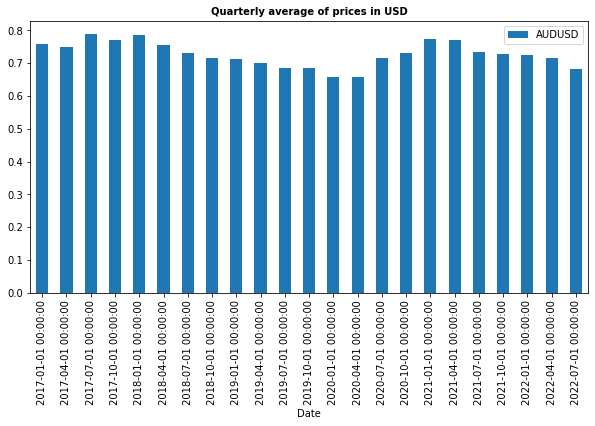

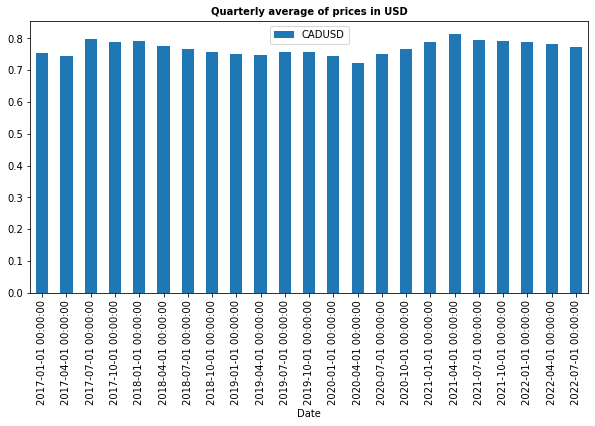

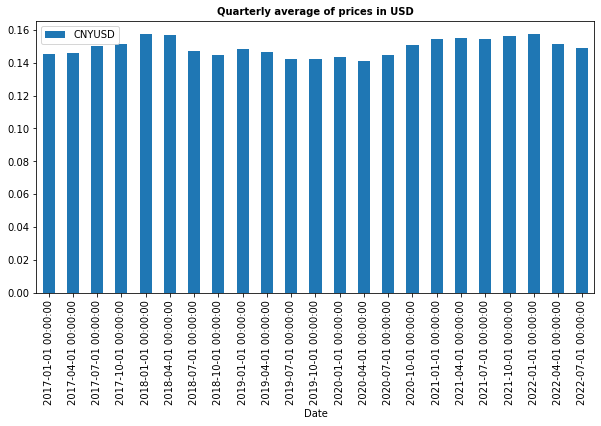

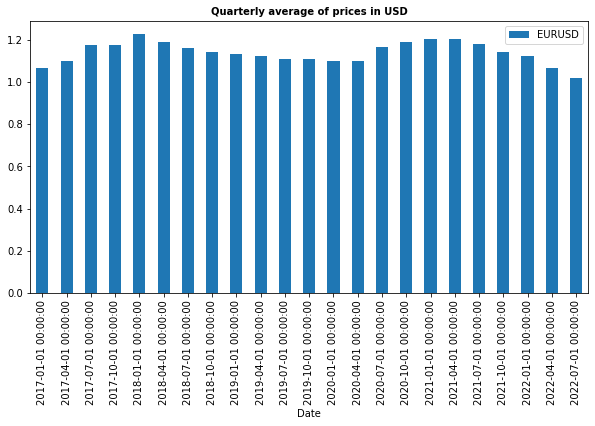

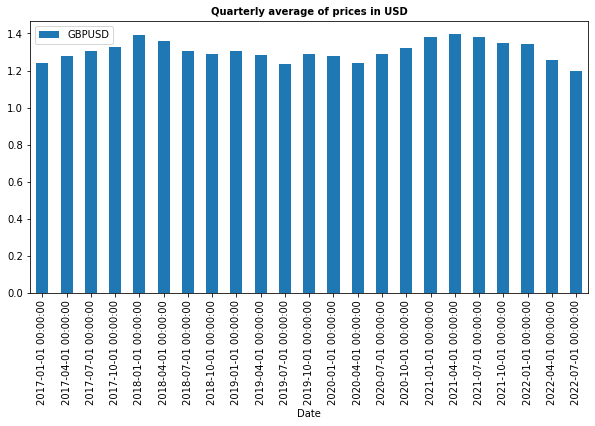

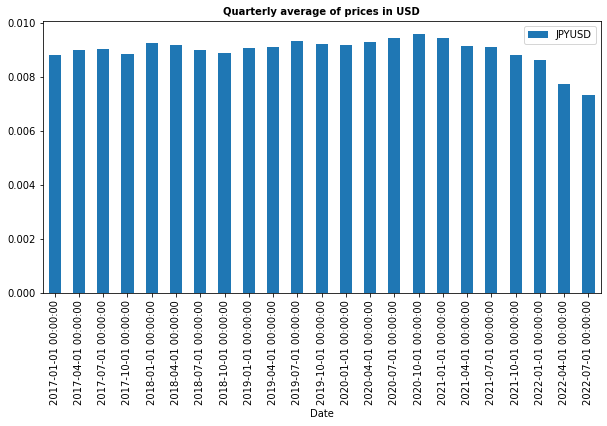

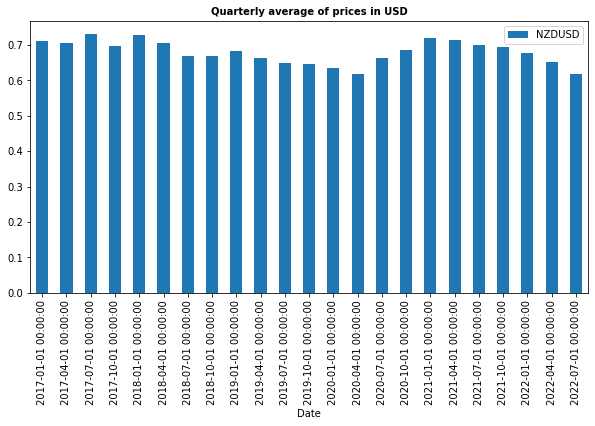

In [ ]:
resample_df_Mmean=resample_df.resample(rule='qs').mean()

for i in range(len(resample_df_Mmean.columns)-1):
  resample_df_Mmean.plot(kind='bar',subplots=True, y=resample_df_Mmean.columns[i],figsize=(10,5)) 
  plt.title('Quarterly average of prices in USD',fontweight="bold",fontsize = 10)
  plt.legend(loc='best')
  plt.show()